# Import necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Model metrics for evaluation and data splitting
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error

from sklearn import metrics

from sklearn.model_selection import train_test_split, cross_val_score

# Visualization for missing data
import missingno as msno

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Model building
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    AdaBoostRegressor,
    GradientBoostingRegressor,
    RandomForestRegressor,
    BaggingRegressor,
)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

from xgboost import XGBRegressor

#SHAP
import shap

In [2]:
All = pd.ExcelFile('allData.xls')
data = pd.read_excel(All, 'Data')
data

Number          Data source Selected Mix number in literature  \
0        NaN       2. Yunusa 2014      NaN                    PC-40   
1        NaN       2. Yunusa 2014      NaN                    PC-50   
2        NaN       2. Yunusa 2014      NaN                    PC-60   
3        NaN       2. Yunusa 2014      NaN                    PC-75   
4        NaN       2. Yunusa 2014      NaN                    FA-40   
...      ...                  ...      ...                      ...   
1983     NaN  J48. Farahani, 2015      NaN                     W3-4   
1984     NaN  J48. Farahani, 2015      NaN                     W4-1   
1985     NaN  J48. Farahani, 2015      NaN                     W4-2   
1986     NaN  J48. Farahani, 2015      NaN                     W4-3   
1987     NaN  J48. Farahani, 2015      NaN                     W4-4   

      ASTM type 1 ordinary Portland Cement content (kg/m^3)  \
0                                                 0.000       
1                                                 0.000       
2                                                 0.000       
3                                                 0.000       
4                                                 0.000       
...                                                 ...       
1983                                            350.000       
1984                                            380.000       
1985                                            370.000       
1986                                            360.000       
1987                                            350.000       

      CEM I 42.5N ordinary Portland Cement content (kg/m^3)  \
0                                                 0.000       
1                                                 0.000       
2                                                 0.000       
3                                                 0.000       
4                                                 0.000       
...                                                 ...       
1983                                              0.000       
1984                                              0.000       
1985                                              0.000       
1986                                              0.000       
1987                                              0.000       

      CEM I 52.5N ordinary Portland Cement content (kg/m^3)  \
0                                               450.000       
1                                               400.000       
2                                               350.000       
3                                               300.000       
4                                               315.000       
...                                                 ...       
1983                                              0.000       
1984                                              0.000       
1985                                              0.000       
1986                                              0.000       
1987                                              0.000       

      Class C Fly ash content (kg/m^3)  Class F Fly ash content (kg/m^3)  \
0                                0.000                             0.000   
1                                0.000                             0.000   
2                                0.000                             0.000   
3                                0.000                             0.000   
4                                0.000                           135.000   
...                                ...                               ...   
1983                             0.000                             0.000   
1984                             0.000                             0.000   
1985                             0.000                             0.000   
1986                             0.000                             0.000   
1987                             0.000        

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 34 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Number                                                              0 non-null      float64
 1   Data source                                                         1988 non-null   object 
 2   Selected                                                            194 non-null    object 
 3   Mix number in literature                                            1988 non-null   object 
 4   ASTM type 1 ordinary Portland Cement content (kg/m^3)               1988 non-null   float64
 5   CEM I 42.5N ordinary Portland Cement content (kg/m^3)               1988 non-null   float64
 6   CEM I 52.5N ordinary Portland Cement content (kg/m^3)               1988 non-null   float64
 7   Class C Fly ash

In [4]:
data.describe().T

count     mean     std  \
Number                                                0.000      NaN     NaN   
ASTM type 1 ordinary Portland Cement content (k... 1988.000   39.318 106.826   
CEM I 42.5N ordinary Portland Cement content (k... 1988.000   95.567 146.591   
CEM I 52.5N ordinary Portland Cement content (k... 1988.000  147.093 152.375   
Class C Fly ash content (kg/m^3)                   1988.000    6.120  28.792   
Class F Fly ash content (kg/m^3)                   1988.000   35.498  65.745   
Slag content (kg/m^3)                              1988.000   34.630  73.838   
Silica fume content (kg/m^3)                       1988.000    7.593  21.082   
Water content (kg/m^3)                             1988.000  172.241  28.372   
Superplasticizer content (kg/m^3)                  1988.000    2.336   4.726   
Maximum coarse aggregate size (mm)                 1988.000   18.122   3.829   
Coarse aggregate content (kg/m^3)                  1983.000 1005.264 163.278   
Fine aggregate content (kg/m^3)                    1983.000  814.084 142.480   
Curing temperature (Celsius degree)                1980.000   21.535   2.892   
Curing humidity (%)                                1980.000   95.007  12.286   
Curing day                                         1978.000   25.849  23.382   
Annual average CO2 concentration of exposed env... 1107.000    0.039   0.009   
Annual average humidity of exposed environment (%) 1225.000   66.540  10.979   
Annual average temperature of exposed environme... 1428.000   20.540   6.432   
Annual wetting times/rainy days of exposed envi... 1107.000   89.622  55.766   
Annual average precipitation of exposed environ... 1107.000  860.357 584.885   
Slump (mm)                                          820.000  105.310  57.099   
Average 28-day compressive strength (Mpa)          1942.000   51.545  20.912   
Average 28-day split strength (Mpa)                  62.000    3.679   1.114   
Chloride diffusion coefficient (10-12 m2/s)          66.000    5.240   6.095   
Average carbonation coefficient (mm/year^0.5)      1095.000    3.719   2.691   

                                                       min     25%      50%  \
Number                                                 NaN     NaN      NaN   
ASTM type 1 ordinary Portland Cement content (k...   0.000   0.000    0.000   
CEM I 42.5N ordinary Portland Cement content (k...   0.000   0.000    0.000   
CEM I 52.5N ordinary Portland Cement content (k...   0.000   0.000  155.000   
Class C Fly ash content (kg/m^3)                     0.000   0.000    0.000   
Class F Fly ash content (kg/m^3)                     0.000   0.000    0.000   
Slag content (kg/m^3)                                0.000   0.000    0.000   
Silica fume content (kg/m^3)                         0.000   0.000    0.000   
Water content (kg/m^3)                             105.000 153.000  170.000   
Superplasticizer content (kg/m^3)                    0.000   0.000    0.000   
Maximum coarse aggregate size (mm)                   9.500  16.000   20.000   
Coarse aggregate content (kg/m^3)                  276.000 879.000 1015.000   
Fine aggregate content (kg/m^3)                    279.000 696.000  800.000   
Curing temperature (Celsius degree)                 13.000  20.000   20.000   
Curing humidity (%)                                 25.000  95.000  100.000   
Curing day                                           1.000  14.000   28.000   
Annual average CO2 concentration of exposed env...   0.010   0.035    0.040   
Annual average humidity of exposed environment (%)  30.000  65.000   70.000   
Annual average temperature of exposed environme...   6.400  17.000   20.000   
Annual wetting times/rainy days of exposed envi...   0.000  44.000   93.000   
Annual average precipitation of exposed environ...   0.000 214.000 1000.000   
Slump (mm)                                           0.000  70.000  100.000   
Average 28-day compressive strength (Mpa)            5.000  37.500   49.429 

In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

Number                                                                1988
Data source                                                              0
Selected                                                              1794
Mix number in literature                                                 0
ASTM type 1 ordinary Portland Cement content (kg/m^3)                    0
CEM I 42.5N ordinary Portland Cement content (kg/m^3)                    0
CEM I 52.5N ordinary Portland Cement content (kg/m^3)                    0
Class C Fly ash content (kg/m^3)                                         0
Class F Fly ash content (kg/m^3)                                         0
Slag content (kg/m^3)                                                    0
Silica fume content (kg/m^3)                                             0
Water content (kg/m^3)                                                   0
Superplasticizer content (kg/m^3)                                        0
Maximum coarse aggregate 

In [7]:
Excess_col_indices = list(range(0, 4)) + list(range(20, 27)) + [33]
semi_df = data.iloc[:, [col for col in range(data.shape[1]) if col not in Excess_col_indices]]
semi_df

ASTM type 1 ordinary Portland Cement content (kg/m^3)  \
0                                                 0.000       
1                                                 0.000       
2                                                 0.000       
3                                                 0.000       
4                                                 0.000       
...                                                 ...       
1983                                            350.000       
1984                                            380.000       
1985                                            370.000       
1986                                            360.000       
1987                                            350.000       

      CEM I 42.5N ordinary Portland Cement content (kg/m^3)  \
0                                                 0.000       
1                                                 0.000       
2                                                 0.000       
3                                                 0.000       
4                                                 0.000       
...                                                 ...       
1983                                              0.000       
1984                                              0.000       
1985                                              0.000       
1986                                              0.000       
1987                                              0.000       

      CEM I 52.5N ordinary Portland Cement content (kg/m^3)  \
0                                               450.000       
1                                               400.000       
2                                               350.000       
3                                               300.000       
4                                               315.000       
...                                                 ...       
1983                                              0.000       
1984                                              0.000       
1985                                              0.000       
1986                                              0.000       
1987                                              0.000       

      Class C Fly ash content (kg/m^3)  Class F Fly ash content (kg/m^3)  \
0                                0.000                             0.000   
1                                0.000                             0.000   
2                                0.000                             0.000   
3                                0.000                             0.000   
4                                0.000                           135.000   
...                                ...                               ...   
1983                             0.000                             0.000   
1984                             0.000                             0.000   
1985                             0.000                             0.000   
1986                             0.000                             0.000   
1987                             0.000                             0.000   

      Slag content (kg/m^3)  Silica fume content (kg/m^3)  \
0                     0.000                         0.000   
1                     0.000                         0.000   
2                     0.000                         0.000   
3                     0.000                         0.000   
4                     0.000                         0.000   
...                     ...                           ...   
1983                  0.000                        50.000   
1984                  0.000                        20.000   
1985                  0.000                        30.000   
1986                  0.000                        40.000   
1987                  0.000                        50.000   

      Water content (kg/m^3)  Superplasticizer content (kg/m^3)  \
0                    1

In [8]:
semi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 22 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   ASTM type 1 ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 1   CEM I 42.5N ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 2   CEM I 52.5N ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 3   Class C Fly ash content (kg/m^3)                       1988 non-null   float64
 4   Class F Fly ash content (kg/m^3)                       1988 non-null   float64
 5   Slag content (kg/m^3)                                  1988 non-null   float64
 6   Silica fume content (kg/m^3)                           1988 non-null   float64
 7   Water content (kg/m^3)                                 1988 non-null   float64
 8   Superplasticizer content (kg/m^3)               

In [9]:
semi_df.describe().T

count     mean     std  \
ASTM type 1 ordinary Portland Cement content (k... 1988.000   39.318 106.826   
CEM I 42.5N ordinary Portland Cement content (k... 1988.000   95.567 146.591   
CEM I 52.5N ordinary Portland Cement content (k... 1988.000  147.093 152.375   
Class C Fly ash content (kg/m^3)                   1988.000    6.120  28.792   
Class F Fly ash content (kg/m^3)                   1988.000   35.498  65.745   
Slag content (kg/m^3)                              1988.000   34.630  73.838   
Silica fume content (kg/m^3)                       1988.000    7.593  21.082   
Water content (kg/m^3)                             1988.000  172.241  28.372   
Superplasticizer content (kg/m^3)                  1988.000    2.336   4.726   
Maximum coarse aggregate size (mm)                 1988.000   18.122   3.829   
Coarse aggregate content (kg/m^3)                  1983.000 1005.264 163.278   
Fine aggregate content (kg/m^3)                    1983.000  814.084 142.480   
Curing temperature (Celsius degree)                1980.000   21.535   2.892   
Curing humidity (%)                                1980.000   95.007  12.286   
Curing day                                         1978.000   25.849  23.382   
Slump (mm)                                          820.000  105.310  57.099   
Average 28-day compressive strength (Mpa)          1942.000   51.545  20.912   
Average 28-day split strength (Mpa)                  62.000    3.679   1.114   
Chloride diffusion coefficient (10-12 m2/s)          66.000    5.240   6.095   
Average carbonation coefficient (mm/year^0.5)      1095.000    3.719   2.691   

                                                       min     25%      50%  \
ASTM type 1 ordinary Portland Cement content (k...   0.000   0.000    0.000   
CEM I 42.5N ordinary Portland Cement content (k...   0.000   0.000    0.000   
CEM I 52.5N ordinary Portland Cement content (k...   0.000   0.000  155.000   
Class C Fly ash content (kg/m^3)                     0.000   0.000    0.000   
Class F Fly ash content (kg/m^3)                     0.000   0.000    0.000   
Slag content (kg/m^3)                                0.000   0.000    0.000   
Silica fume content (kg/m^3)                         0.000   0.000    0.000   
Water content (kg/m^3)                             105.000 153.000  170.000   
Superplasticizer content (kg/m^3)                    0.000   0.000    0.000   
Maximum coarse aggregate size (mm)                   9.500  16.000   20.000   
Coarse aggregate content (kg/m^3)                  276.000 879.000 1015.000   
Fine aggregate content (kg/m^3)                    279.000 696.000  800.000   
Curing temperature (Celsius degree)                 13.000  20.000   20.000   
Curing humidity (%)                                 25.000  95.000  100.000   
Curing day                                           1.000  14.000   28.000   
Slump (mm)                                           0.000  70.000  100.000   
Average 28-day compressive strength (Mpa)            5.000  37.500   49.429   
Average 28-day split strength (Mpa)                  0.960   2.910    3.570   
Chloride diffusion coefficient (10-12 m2/s)          0.500   2.094    3.144   
Average carbonation coefficient (mm/year^0.5)        0.000   1.719    3.193   

                                                        75%      max  
ASTM type 1 ordinary Portland Cement content (k...    0.000  702.000  
CEM I 42.5N ordinary Portland Cement content (k...  210.000  547.000  
CEM I 52.5N ordinary Portland Cement content (k...  280.000  660.000  
Class C Fly ash content (kg/m^3)                      0.000  225.000  
Class F Fly ash content (kg/m^3)                     56.500  544.000  
Slag content (kg/m^3)                                 0.000  440.000  
Silica fume content (kg/m^3)                          0.000  150.000  
Water content (kg/m^3)                              186.000  295.000  
Superplasticizer content (kg/m^3)                     2.703   35.100  
Max

# EDA

In [10]:
# function to plot a boxplot and a histogram along the same scale.

def hist_boxplot(data, feature, figsize = (12,7),kde = True, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,
        sharex= True,
        gridspec_kw ={'height_ratios': (0.25,0.75)},
        figsize = figsize)
    sns.boxplot(data=data, x =feature, ax = ax_box2, showmeans = True, color = 'violet')

    if bins:
        sns.histplot(data=data, x =feature, kde = kde, ax = ax_hist2, bins=bins, palette = 'winter')

    else:
        sns.histplot(data=data, x =feature, kde = kde, ax = ax_hist2, palette = 'winter')
    ax_hist2.axvline(data[feature].mean(), color = 'green', linestyle = "--")
    ax_hist2.axvline(data[feature].median(), color = 'black', linestyle = "-")

In [11]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

## Uni-variate

In [12]:
num_df = semi_df.select_dtypes(include=np.number)
obj_df = semi_df.select_dtypes(include=['object'])

Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` vari

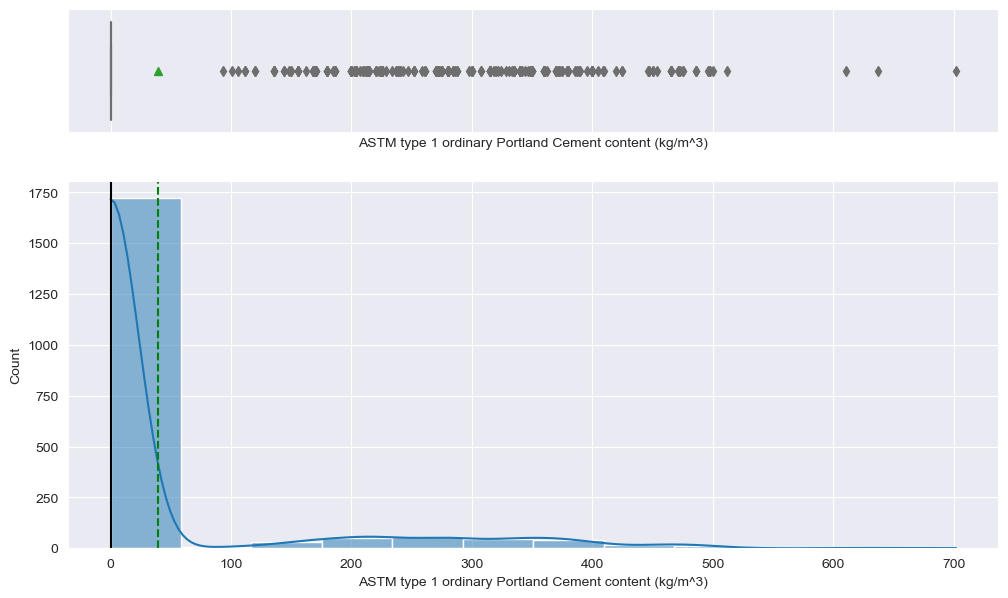

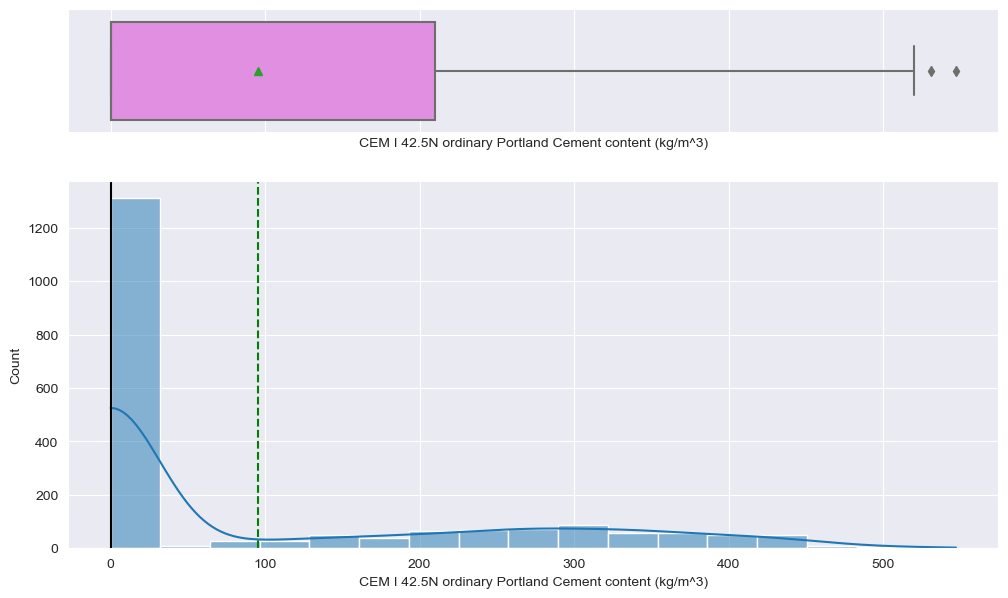

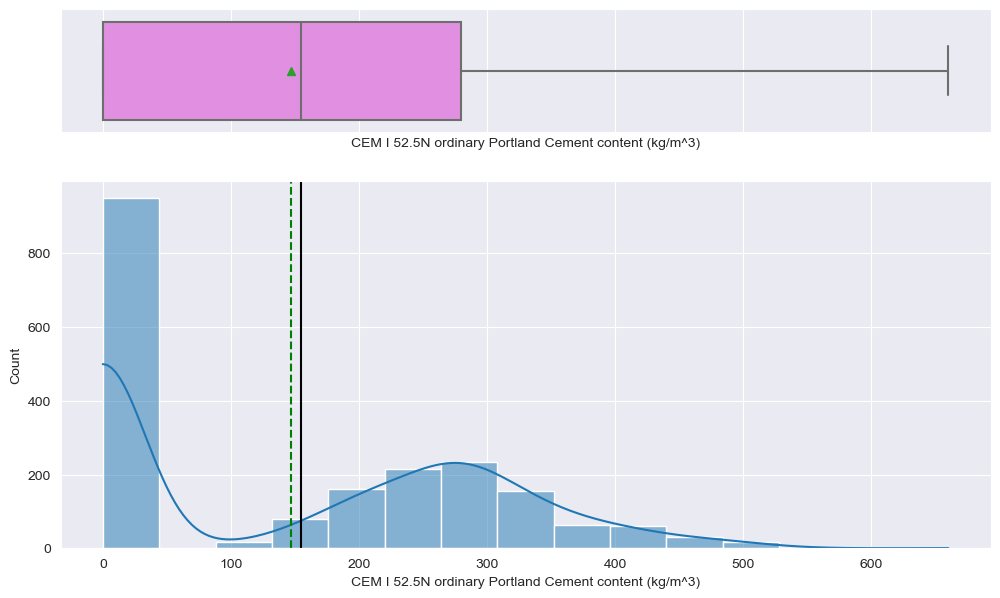

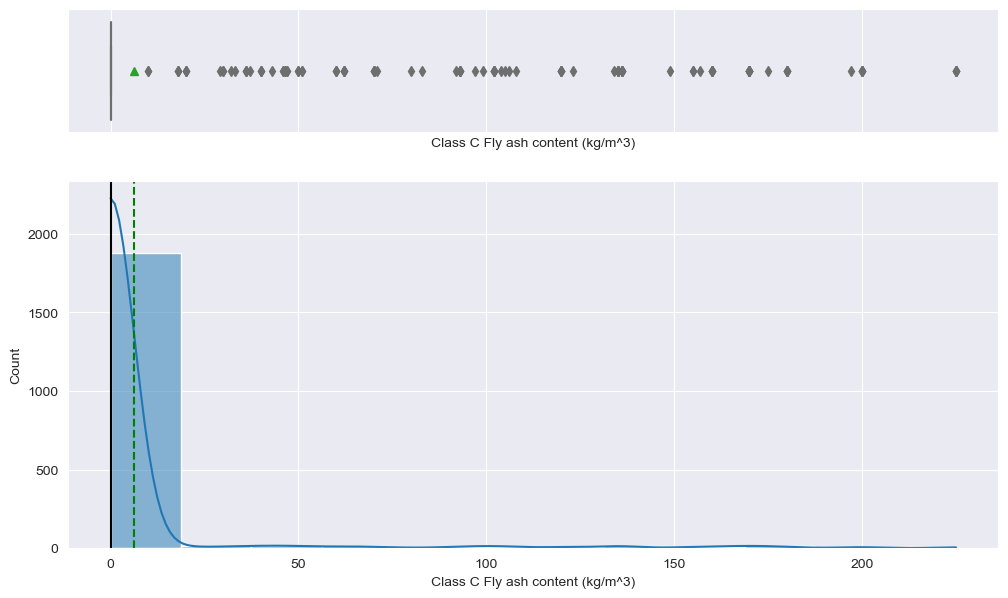

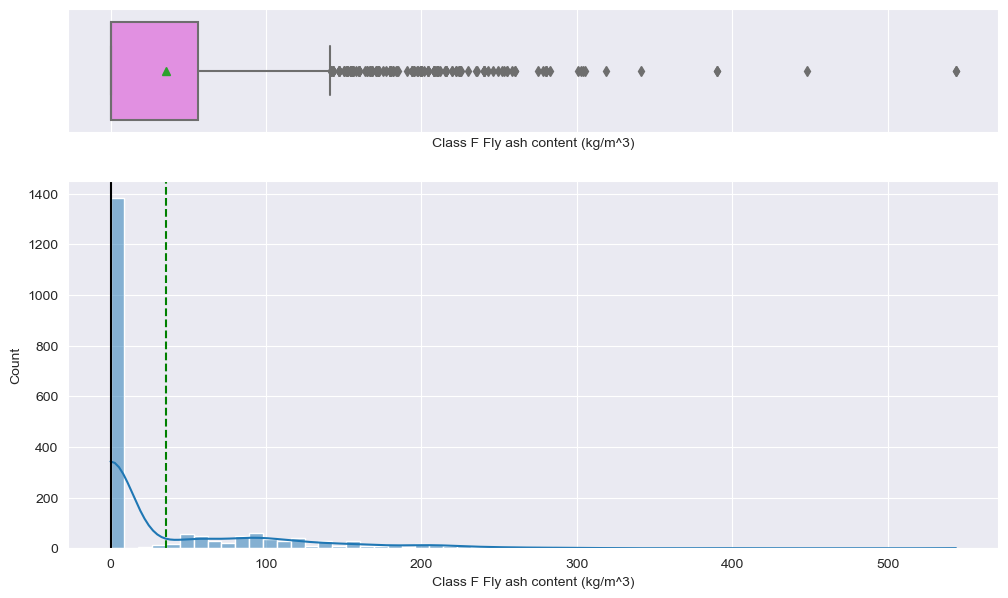

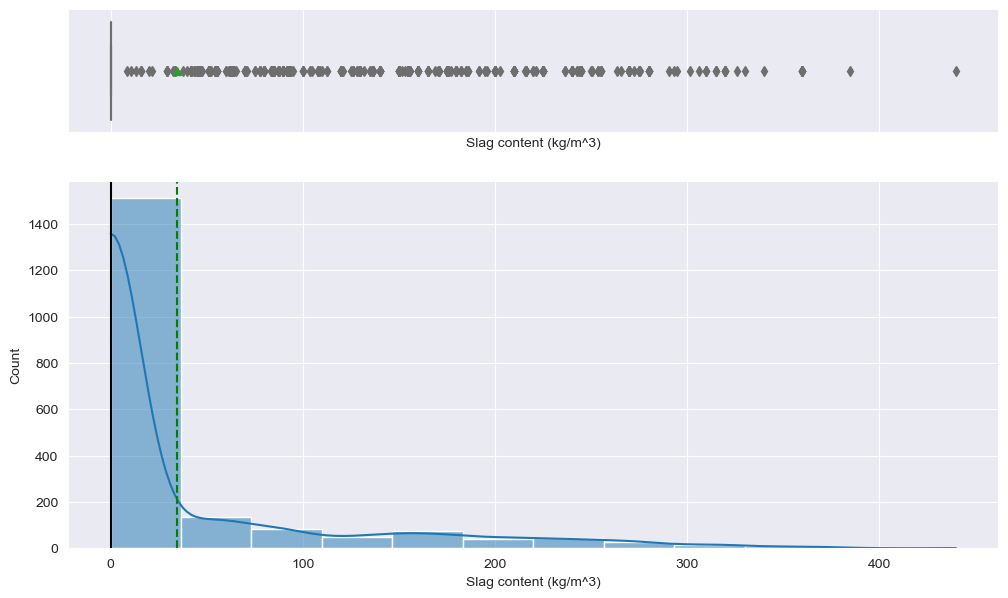

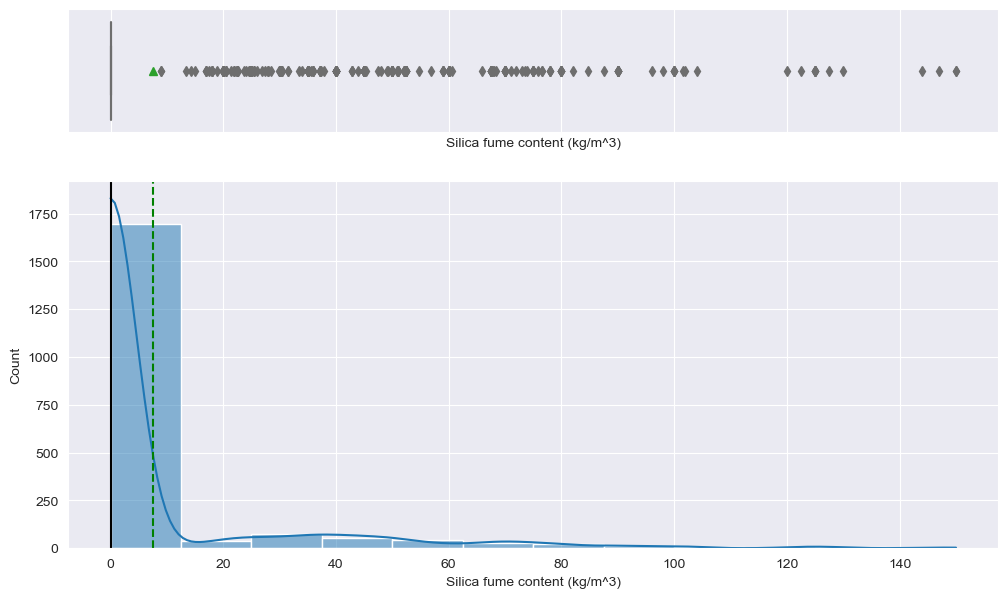

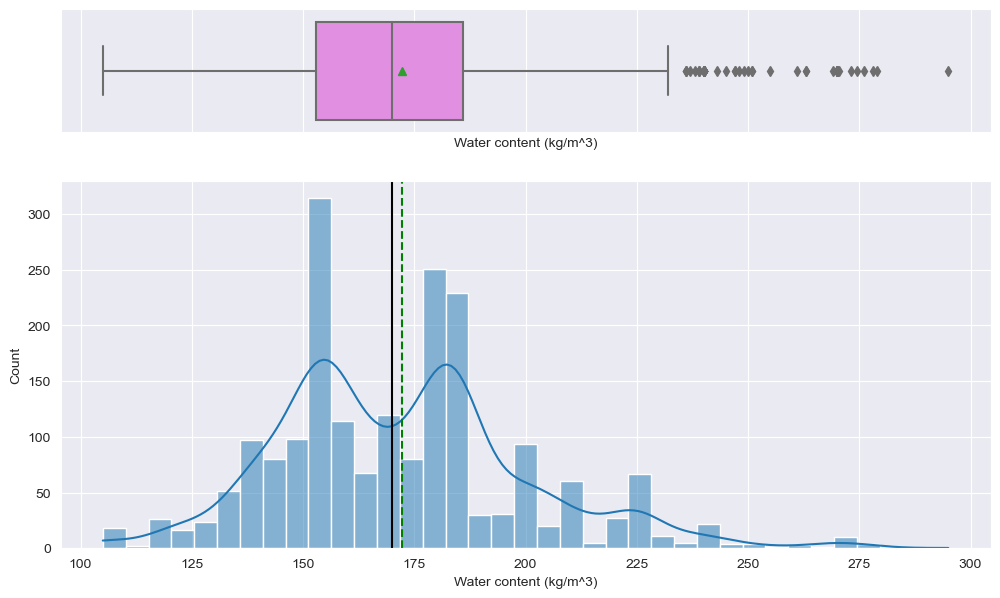

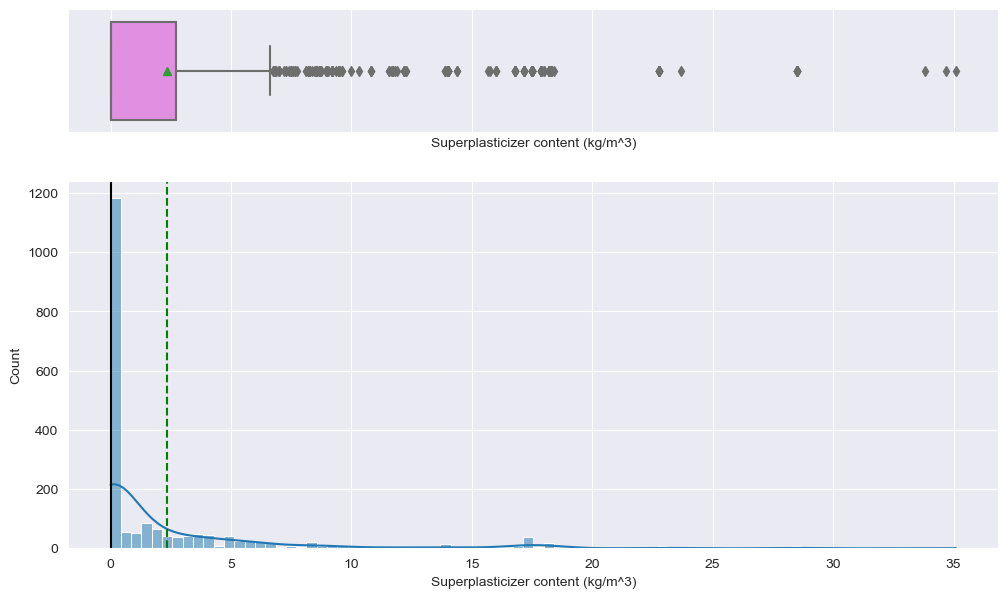

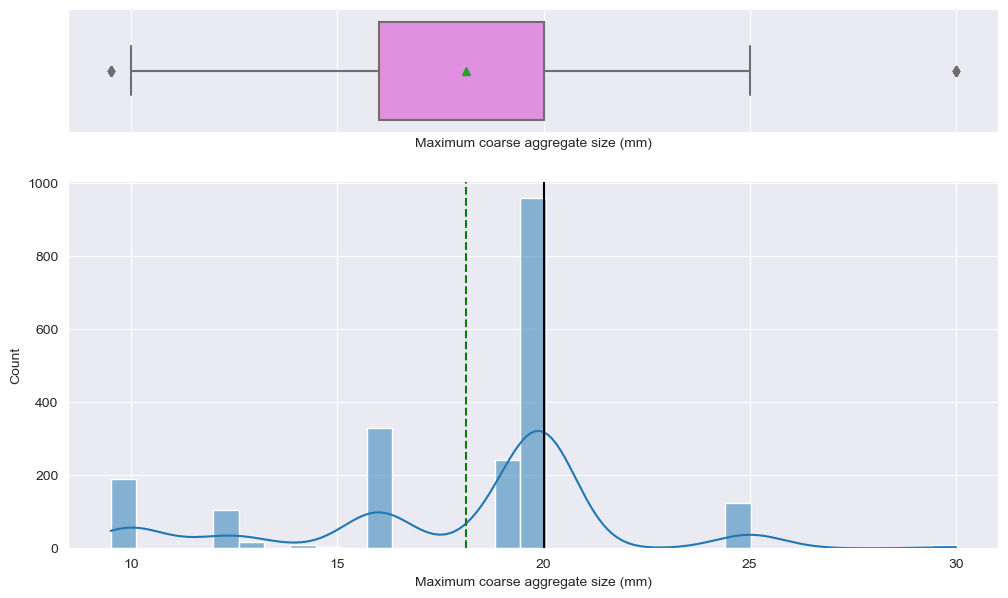

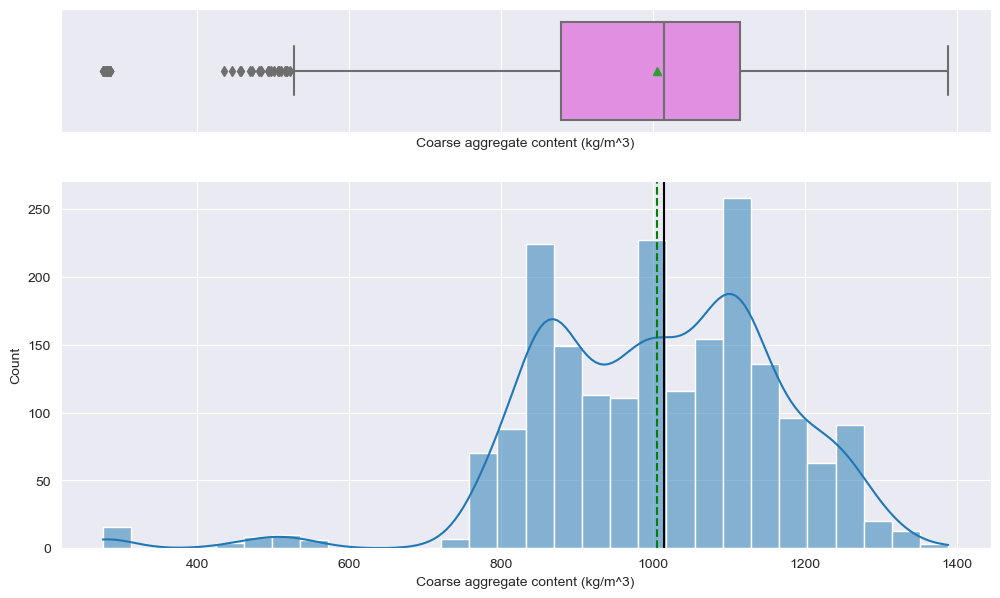

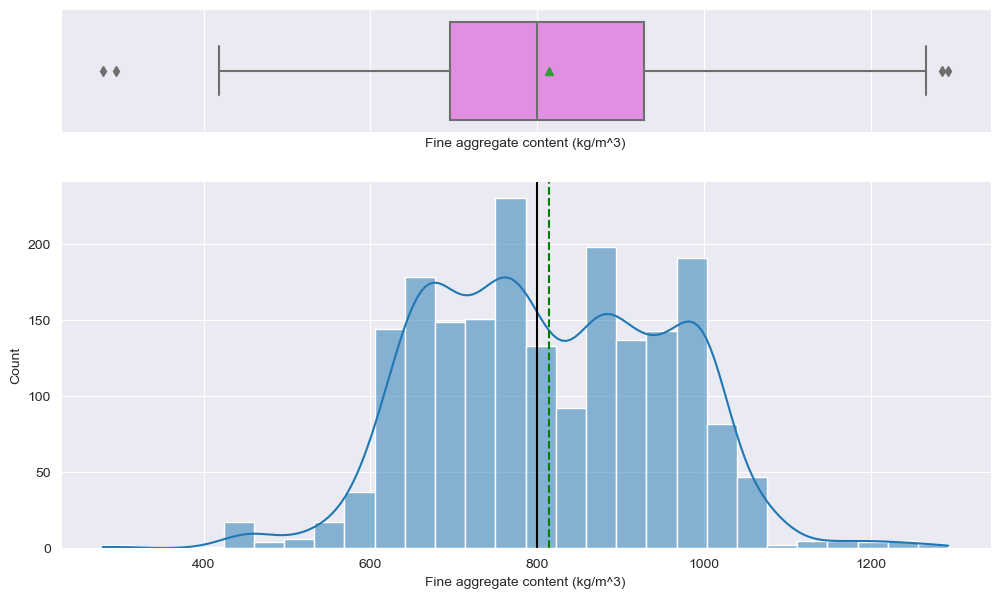

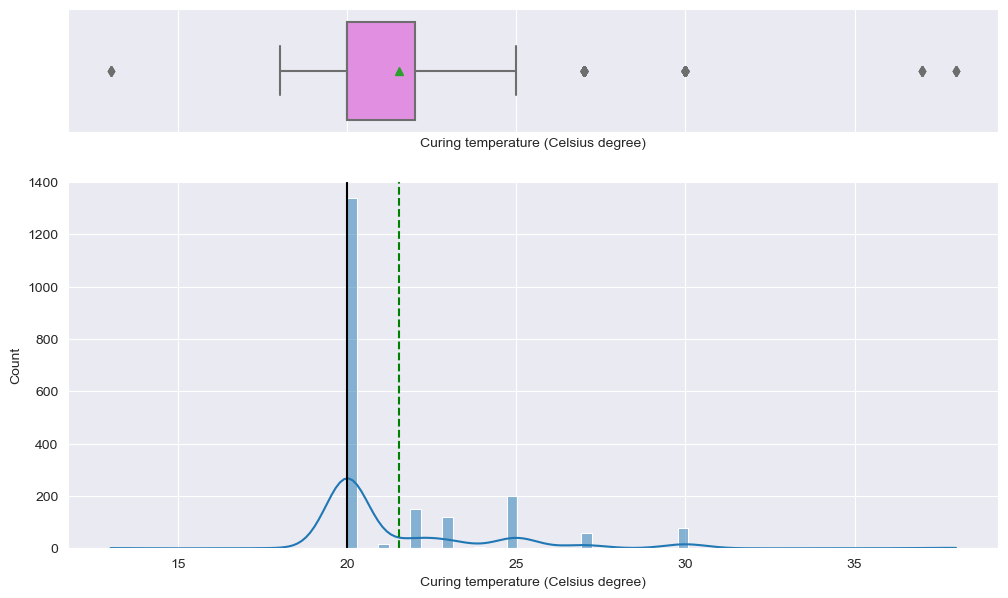

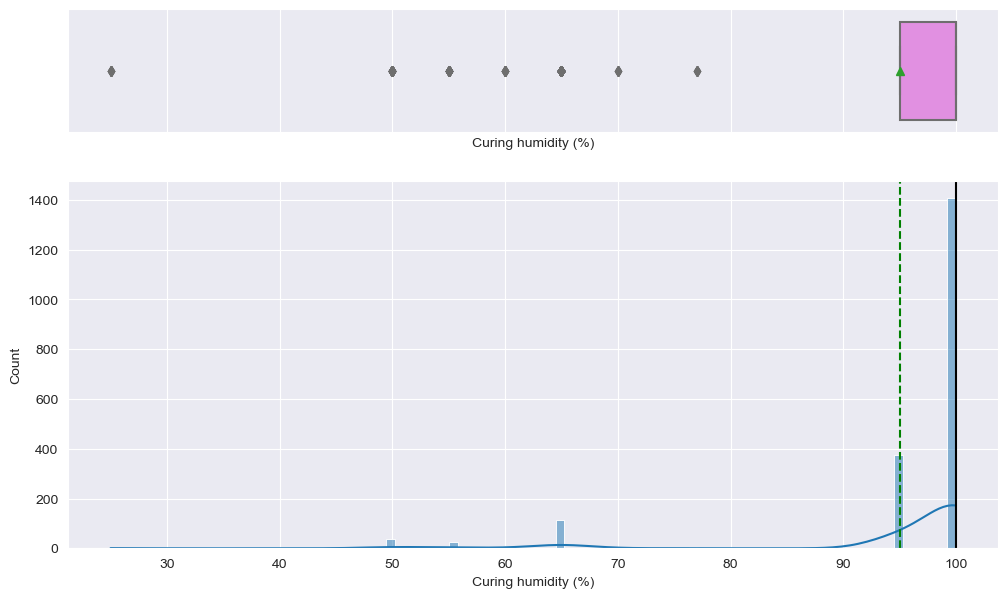

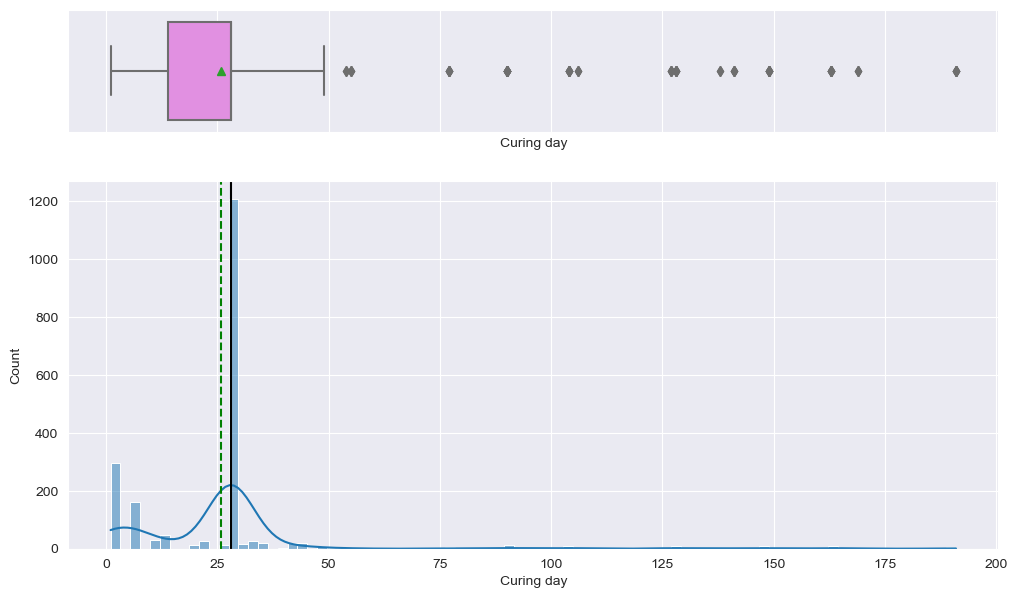

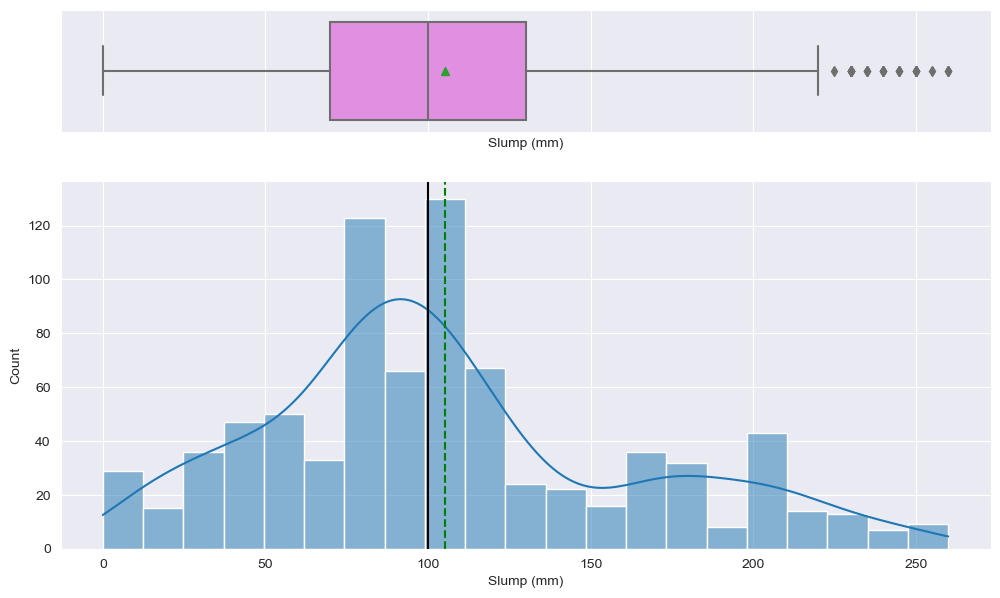

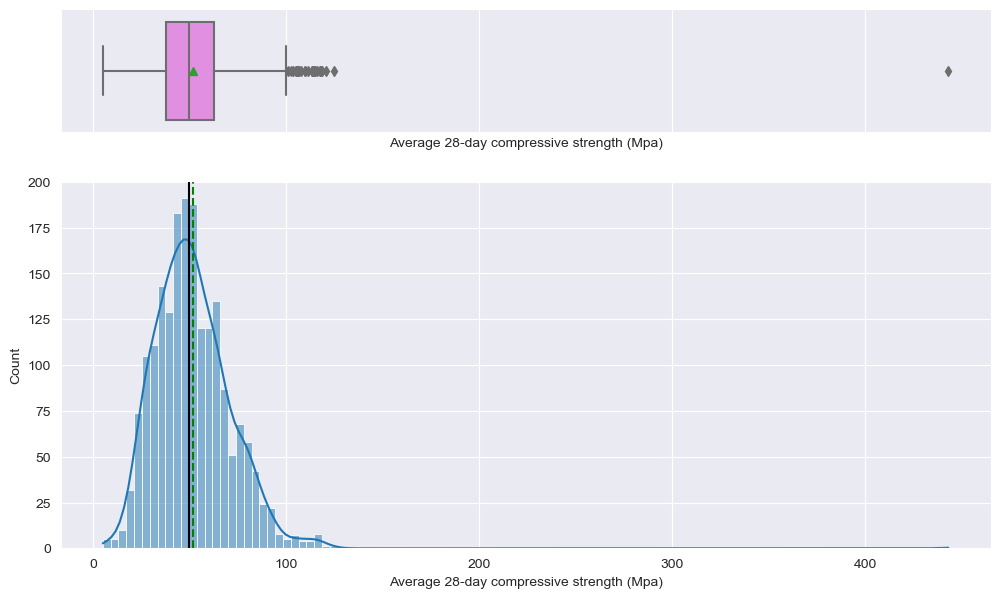

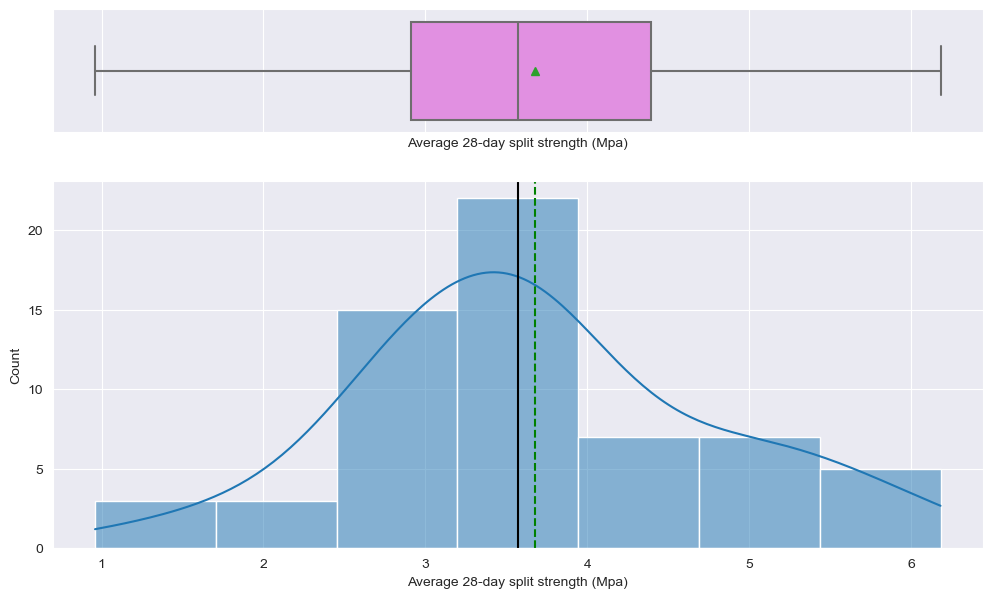

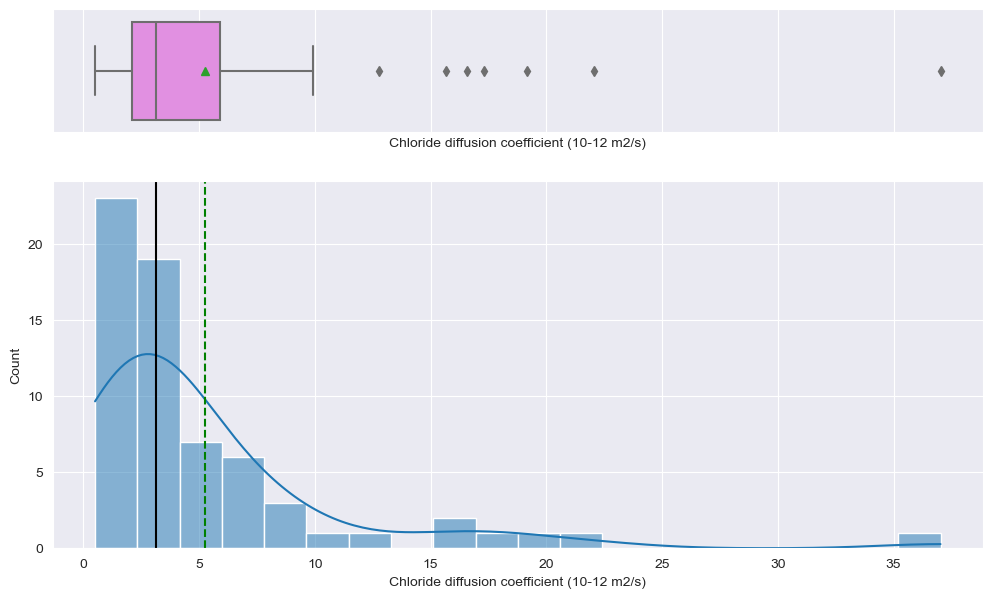

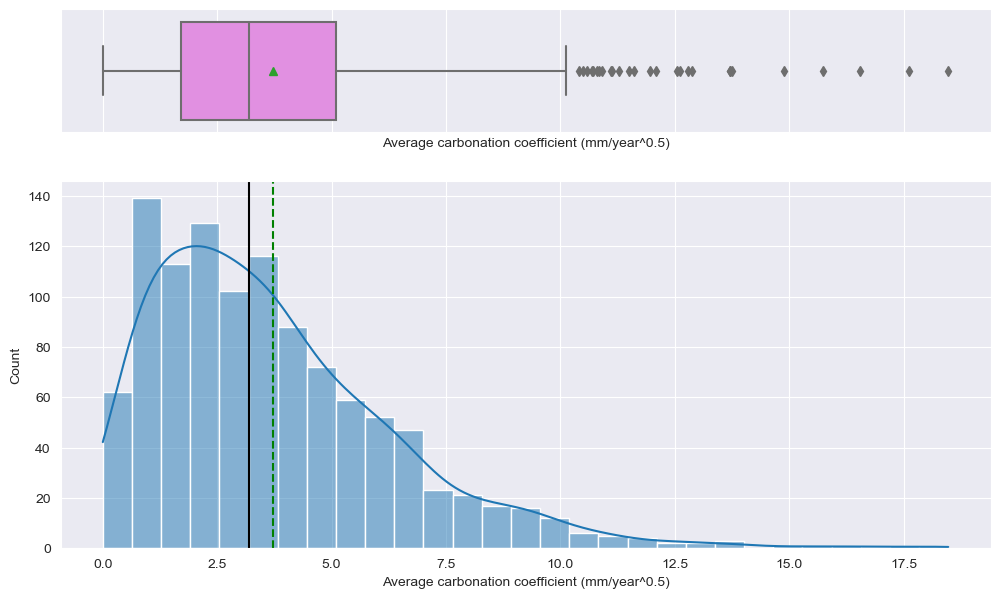

In [13]:
for col in num_df.columns:
    hist_boxplot(num_df, col)

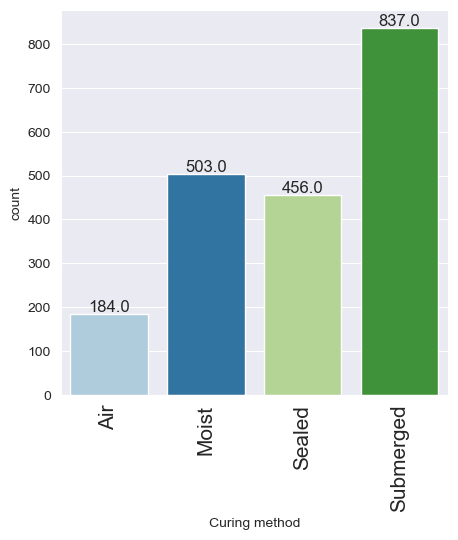

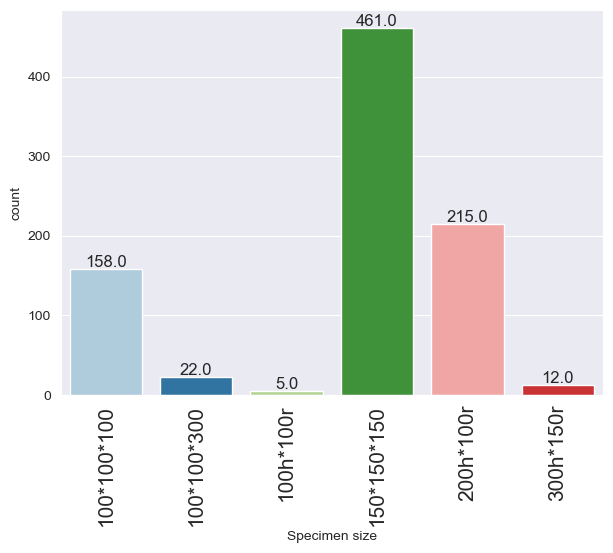

In [14]:
for col in obj_df.columns:
    labeled_barplot(obj_df, col)

* For compressive strength, there is an outlier of >400 MPa.

## Bi-variate

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


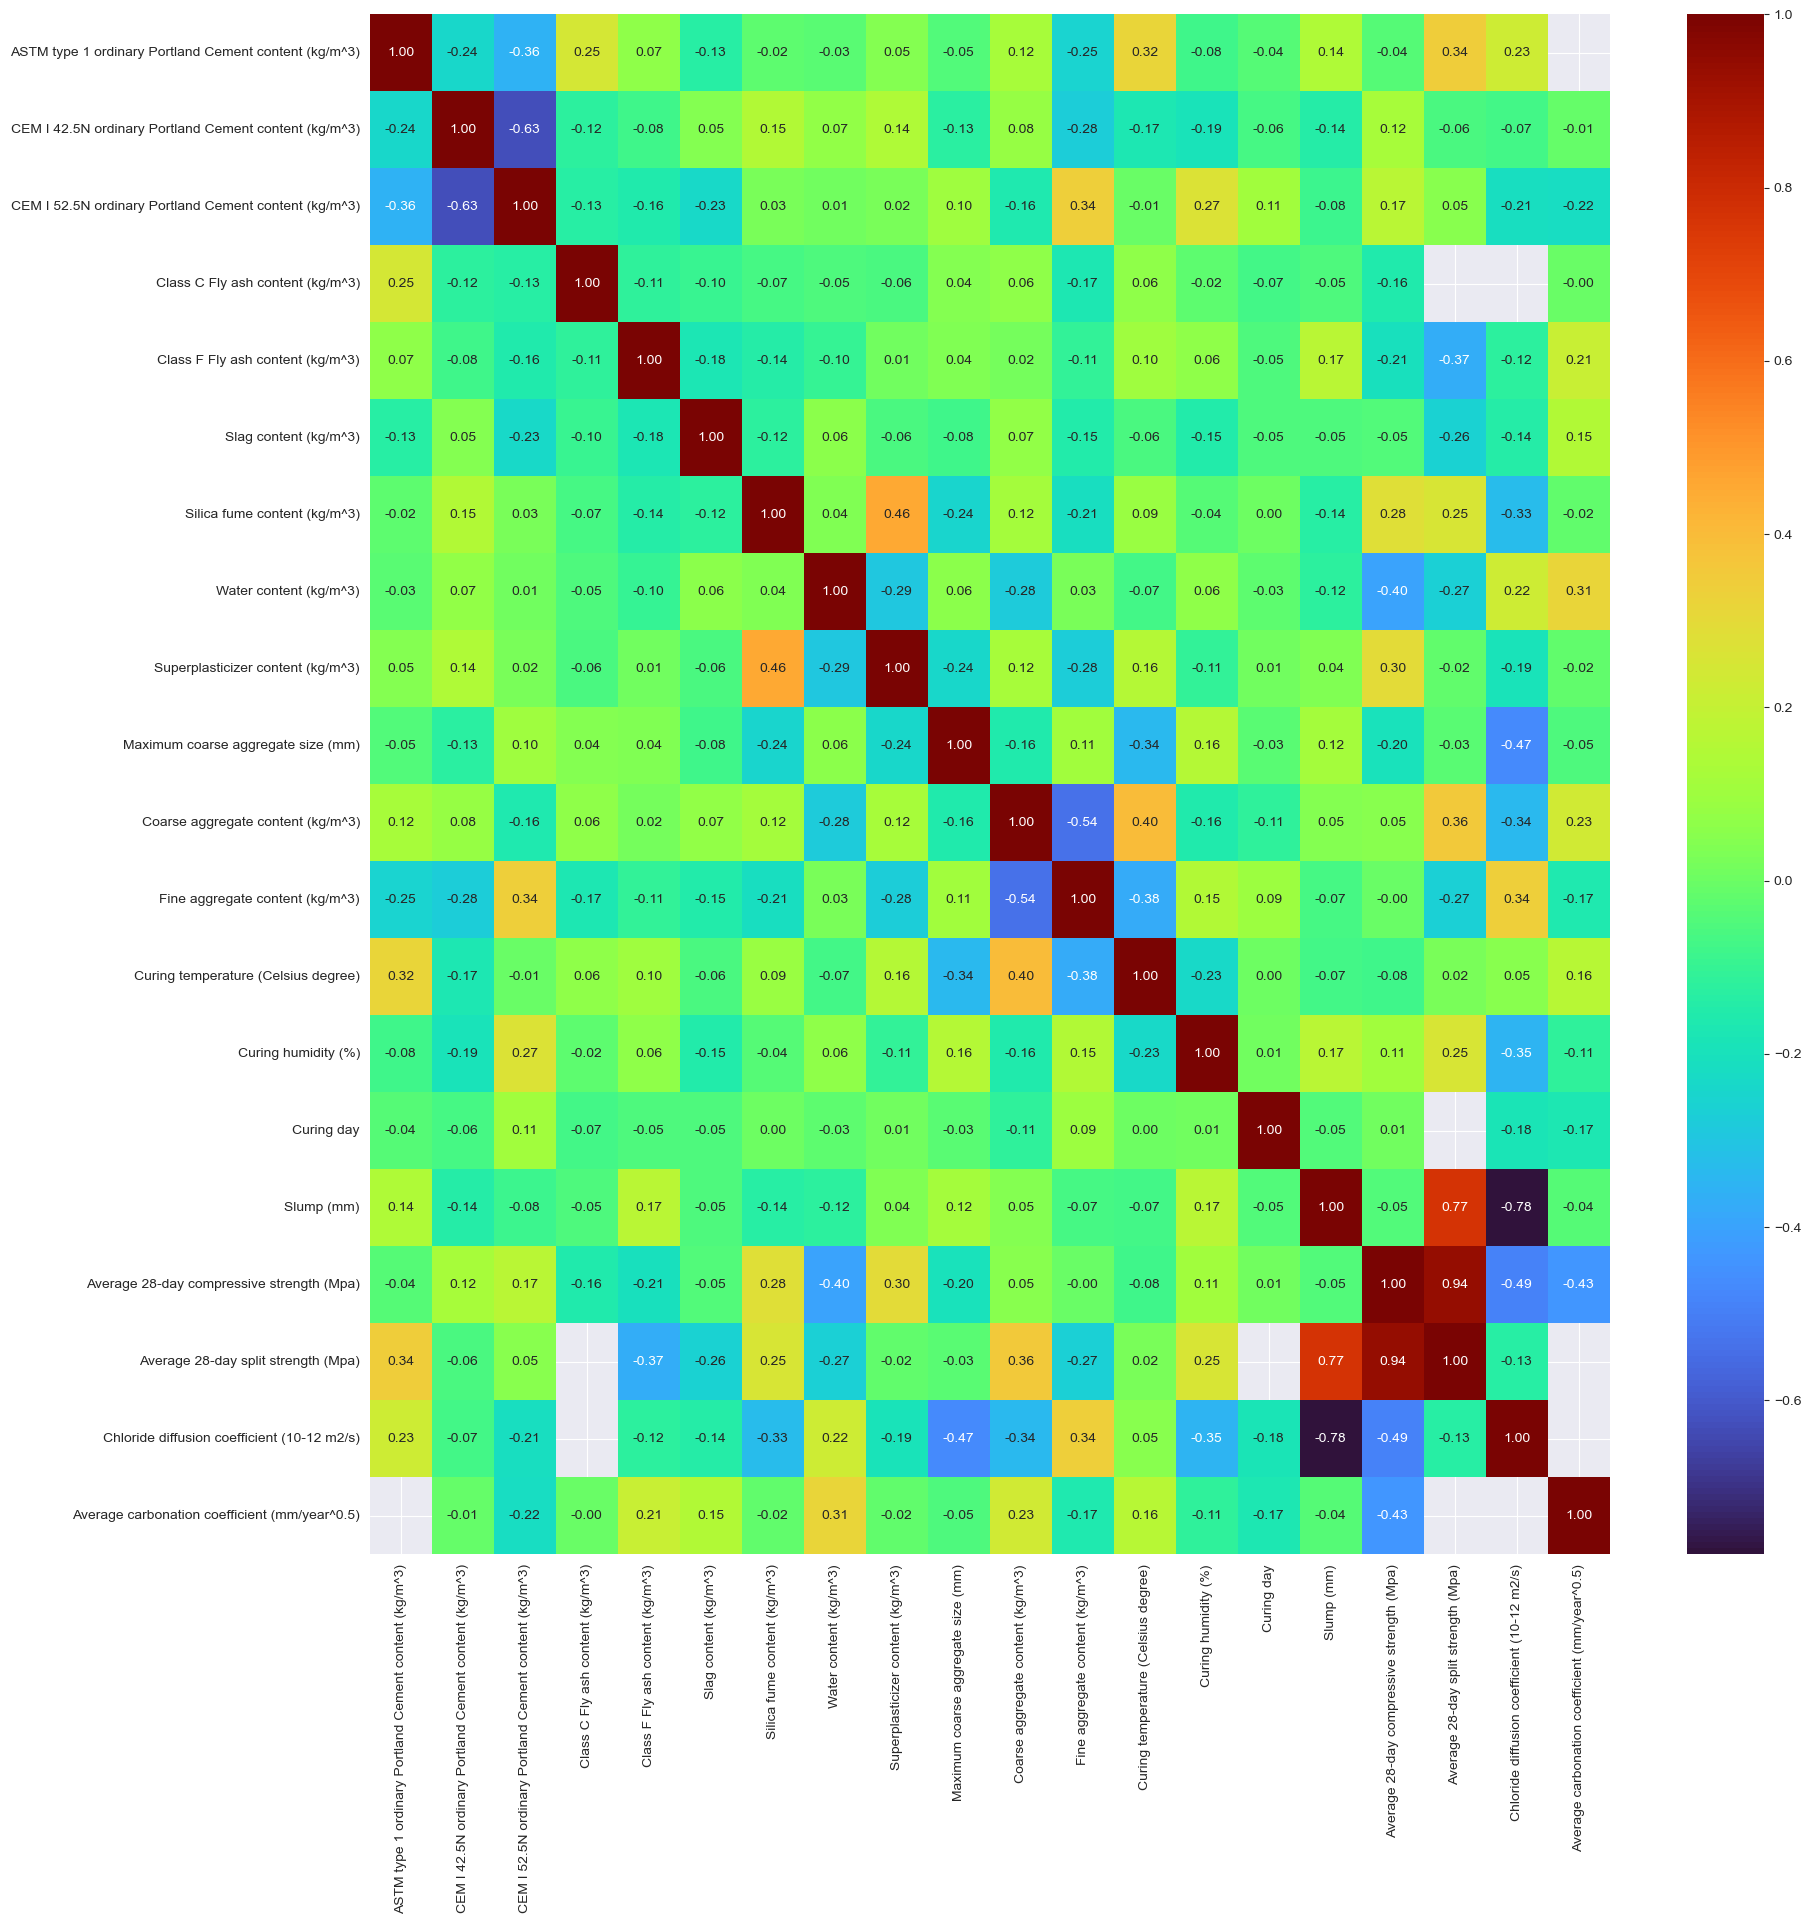

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(semi_df.corr(), annot = True, fmt='.2f', cmap = 'turbo')
plt.show()

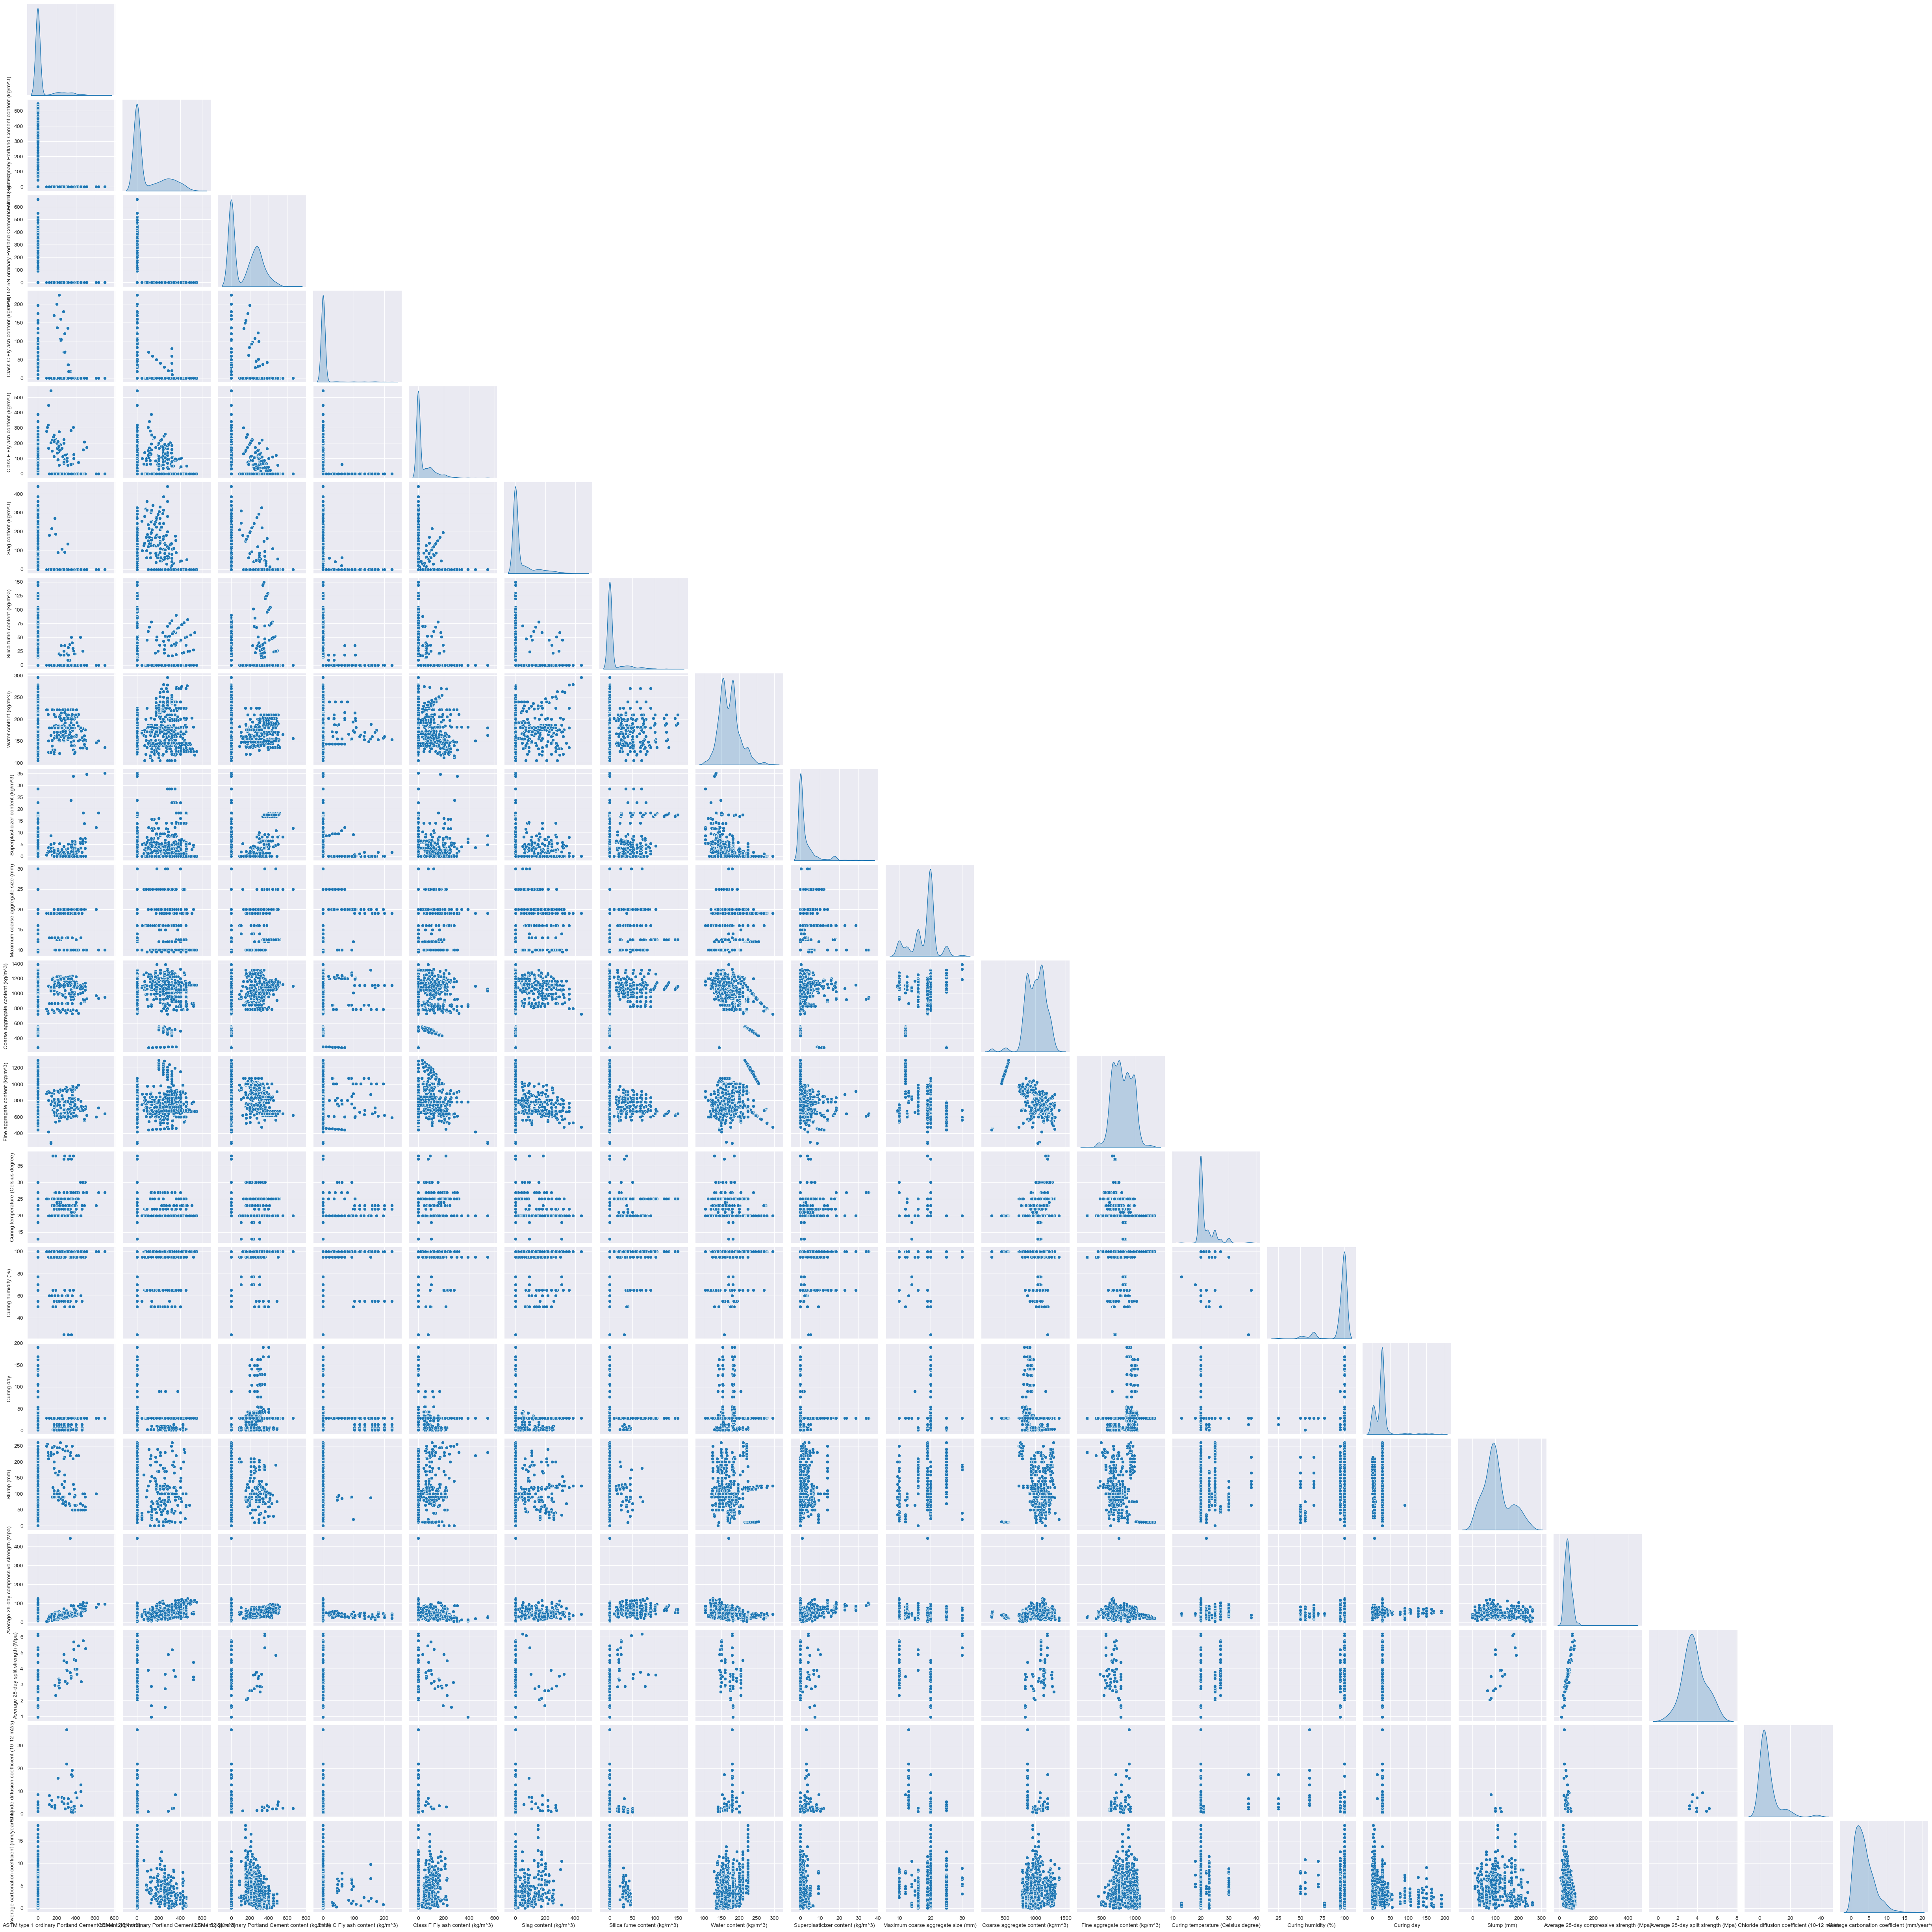

In [16]:
sns.pairplot(semi_df, diag_kind='kde', corner=True);

# Data-Preprocessing

## Outlier Detection

In [17]:
Q1 = semi_df.quantile(0.25)  # To find the 25th percentile
Q3 = semi_df.quantile(0.75)  # To find the 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


In [18]:
# checking the % outliers
outliers = ((semi_df.select_dtypes(include=["float64", "int64"]) < lower) | (semi_df.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(semi_df) * 100
outliers

ASTM type 1 ordinary Portland Cement content (kg/m^3)   13.431
CEM I 42.5N ordinary Portland Cement content (kg/m^3)    0.101
CEM I 52.5N ordinary Portland Cement content (kg/m^3)    0.000
Class C Fly ash content (kg/m^3)                         5.684
Class F Fly ash content (kg/m^3)                         8.300
Slag content (kg/m^3)                                   24.950
Silica fume content (kg/m^3)                            14.839
Water content (kg/m^3)                                   2.767
Superplasticizer content (kg/m^3)                        9.909
Maximum coarse aggregate size (mm)                       0.905
Coarse aggregate content (kg/m^3)                        1.811
Fine aggregate content (kg/m^3)                          0.201
Curing temperature (Celsius degree)                      7.696
Curing humidity (%)                                     10.010
Curing day                                               3.773
Slump (mm)                                             

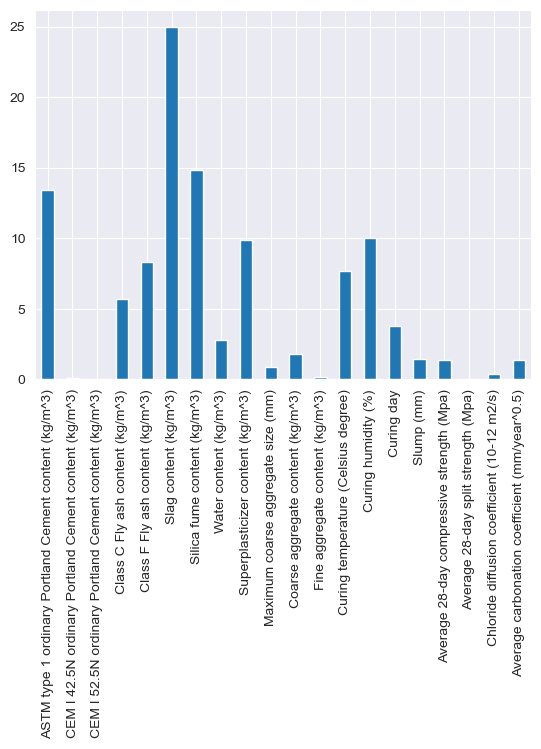

In [19]:
outliers.plot.bar()
plt.show()

## Feature engineering

In [20]:
for col in obj_df.columns:
    value_counts = obj_df[col].value_counts()
    print(f"Column '{col}':")
    print(value_counts)
    print()

Column 'Curing method':
Submerged    837
Moist        503
Sealed       456
Air          184
Name: Curing method, dtype: int64

Column 'Specimen size':
150*150*150    461
200h*100r      215
100*100*100    158
100*100*300     22
300h*150r       12
100h*100r        5
Name: Specimen size, dtype: int64


### Curing method

In [21]:
curing_method = {'Air':0, 
                 'Sealed':1,
                 'Moist':2,
                 'Submerged':3,
                 }

semi_df['Curing method'] = semi_df['Curing method'].map(curing_method)
semi_df['Curing method'].value_counts()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


3.000    837
2.000    503
1.000    456
0.000    184
Name: Curing method, dtype: int64

### Compressive strength conversion index 

* Inspect the outliers before continuing  

In [22]:
semi_df[semi_df['Average 28-day compressive strength (Mpa)']>400] 

ASTM type 1 ordinary Portland Cement content (kg/m^3)  \
1657                                            340.000       

      CEM I 42.5N ordinary Portland Cement content (kg/m^3)  \
1657                                              0.000       

      CEM I 52.5N ordinary Portland Cement content (kg/m^3)  \
1657                                              0.000       

      Class C Fly ash content (kg/m^3)  Class F Fly ash content (kg/m^3)  \
1657                             0.000                             0.000   

      Slag content (kg/m^3)  Silica fume content (kg/m^3)  \
1657                  0.000                         0.000   

      Water content (kg/m^3)  Superplasticizer content (kg/m^3)  \
1657                 170.000                              0.850   

      Maximum coarse aggregate size (mm)  ...  Curing method  \
1657                              19.000  ...          3.000   

      Curing temperature (Celsius degree)  Curing humidity (%)  Curing day  \
1657                               22.000              100.000       7.000   

      Slump (mm)  Average 28-day compressive strength (Mpa)  \
1657         NaN                                    443.000   

      Average 28-day split strength (Mpa)  \
1657                                  NaN   

      Chloride diffusion coefficient (10-12 m2/s)  \
1657                                          NaN   

      Average carbonation coefficient (mm/year^0.5)  Specimen size  
1657                                            NaN      200h*100r  

[1 rows x 22 columns]

* It is likely to be a typo.

Ignoring `palette` because no `hue` variable has been assigned.


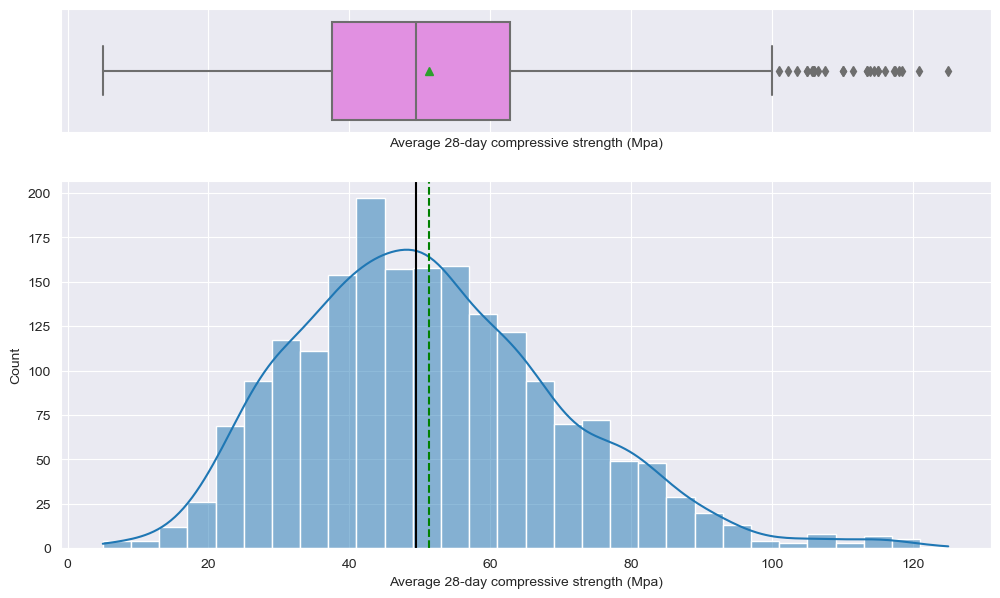

In [23]:
filtered_row = semi_df[semi_df['Average 28-day compressive strength (Mpa)'] > 400]

# Check if only one row is obtained
if len(filtered_row) == 1:
    value_to_divide = filtered_row['Average 28-day compressive strength (Mpa)'].values[0]
    updated_value = value_to_divide / 10

    # Update the value in the DataFrame
    semi_df.loc[semi_df['Average 28-day compressive strength (Mpa)'] > 400, 'Average 28-day compressive strength (Mpa)'] = updated_value
else:
    print("No rows or multiple rows matching the condition.")

hist_boxplot(semi_df, 'Average 28-day compressive strength (Mpa)')

ValueError: Could not save to JPEG for display

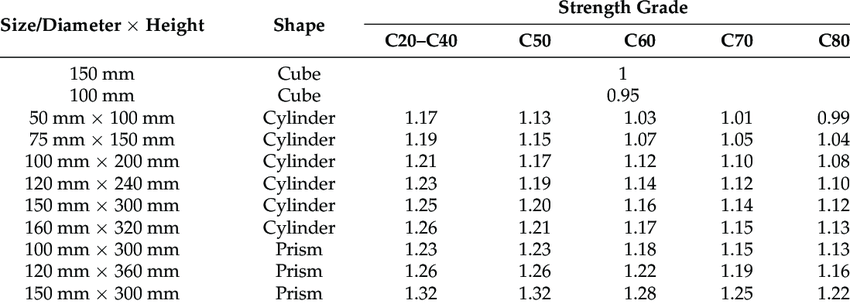

In [24]:
from PIL import Image
from  IPython.display import display

img = Image.open("C:/Users/leeno/Desktop/Dataspell/4102/Conversion-factors-of-compressive-strength-13-16.png")
display(img)

# https://www.researchgate.net/figure/Conversion-factors-of-compressive-strength-13-16_tbl1_358411439

In [25]:
conversion_factors = {
    '150*150*150': 1.0,
    '200h*100r': {
        (15, 44): 1.21,
        (45, 54): 1.17,
        (55, 64): 1.12,
        (65, 74): 1.10,
        (75, 84): 1.08,
        (85, 94): 1.06,
        (95, 104): 1.04, # Guess, out of range
        (105, 114): 1.02, 
    },
    '100*100*100': 0.95,
    '100*100*300': {},  # No suitable conversion index available
    '300h*150r': {
        (15, 44): 1.32,
        (45, 54): 1.32,
        (55, 64): 1.28,
        (65, 74): 1.25,
        (75, 84): 1.22,
        (85, 94): 1.19,
        (95, 104): 1.16,
        (105, 114): 1.13,
    },
    '100h*100r': {},  # No suitable conversion index available
}

def convert_strength(row):
    size = row['Specimen size']
    strength = row['Average 28-day compressive strength (Mpa)']

    original_size = size  # Store the original size

    if size in conversion_factors:
        factor = conversion_factors[size]

        if isinstance(factor, dict):
            for range_, conversion_factor in factor.items():
                lower_bound, upper_bound = range_
                if lower_bound <= strength < upper_bound:
                    return strength * conversion_factor
        else:
            return strength * factor

    return strength

# Apply the conversion function to the DataFrame
semi_df['Converted Strength'] = semi_df.apply(convert_strength, axis=1)

# Print the updated DataFrame
print(semi_df)

      ASTM type 1 ordinary Portland Cement content (kg/m^3)  \
0                                                 0.000       
1                                                 0.000       
2                                                 0.000       
3                                                 0.000       
4                                                 0.000       
...                                                 ...       
1983                                            350.000       
1984                                            380.000       
1985                                            370.000       
1986                                            360.000       
1987                                            350.000       

      CEM I 42.5N ordinary Portland Cement content (kg/m^3)  \
0                                                 0.000       
1                                                 0.000       
2                                                 0.00


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [26]:
# Create a boolean mask indicating differences between the columns
strength_diff_mask = semi_df['Average 28-day compressive strength (Mpa)'] != semi_df['Converted Strength']

# Filter the DataFrame to show rows where the columns are different
different_strength_df = semi_df[strength_diff_mask]

# Print the resulting DataFrame
print(different_strength_df)

      ASTM type 1 ordinary Portland Cement content (kg/m^3)  \
1167                                            372.000       
1168                                            280.000       
1169                                            186.000       
1170                                            280.000       
1171                                            156.000       
...                                                 ...       
1983                                            350.000       
1984                                            380.000       
1985                                            370.000       
1986                                            360.000       
1987                                            350.000       

      CEM I 42.5N ordinary Portland Cement content (kg/m^3)  \
1167                                              0.000       
1168                                              0.000       
1169                                              0.00

In [27]:
semi_df['Converted Strength']

0      75.930
1      64.500
2      49.230
3      36.000
4      62.800
        ...  
1983      NaN
1984      NaN
1985      NaN
1986      NaN
1987      NaN
Name: Converted Strength, Length: 1988, dtype: float64

In [28]:
new_df = semi_df.copy()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 23 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   ASTM type 1 ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 1   CEM I 42.5N ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 2   CEM I 52.5N ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 3   Class C Fly ash content (kg/m^3)                       1988 non-null   float64
 4   Class F Fly ash content (kg/m^3)                       1988 non-null   float64
 5   Slag content (kg/m^3)                                  1988 non-null   float64
 6   Silica fume content (kg/m^3)                           1988 non-null   float64
 7   Water content (kg/m^3)                                 1988 non-null   float64
 8   Superplasticizer content (kg/m^3)               

In [29]:
new_df = new_df.drop(['Curing day', 'Curing humidity (%)', 'Slump (mm)', 'Chloride diffusion coefficient (10-12 m2/s)', 'Average carbonation coefficient (mm/year^0.5)', 'Average 28-day split strength (Mpa)', 'Average 28-day compressive strength (Mpa)', 'Specimen size'], axis = 1)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 15 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   ASTM type 1 ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 1   CEM I 42.5N ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 2   CEM I 52.5N ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 3   Class C Fly ash content (kg/m^3)                       1988 non-null   float64
 4   Class F Fly ash content (kg/m^3)                       1988 non-null   float64
 5   Slag content (kg/m^3)                                  1988 non-null   float64
 6   Silica fume content (kg/m^3)                           1988 non-null   float64
 7   Water content (kg/m^3)                                 1988 non-null   float64
 8   Superplasticizer content (kg/m^3)               

## Train-Test split (drop na)

In [30]:
new_df_drop = new_df.copy()
new_df_drop.dropna(inplace = True)

In [31]:
new_df_drop.isnull().sum()

ASTM type 1 ordinary Portland Cement content (kg/m^3)    0
CEM I 42.5N ordinary Portland Cement content (kg/m^3)    0
CEM I 52.5N ordinary Portland Cement content (kg/m^3)    0
Class C Fly ash content (kg/m^3)                         0
Class F Fly ash content (kg/m^3)                         0
Slag content (kg/m^3)                                    0
Silica fume content (kg/m^3)                             0
Water content (kg/m^3)                                   0
Superplasticizer content (kg/m^3)                        0
Maximum coarse aggregate size (mm)                       0
Coarse aggregate content (kg/m^3)                        0
Fine aggregate content (kg/m^3)                          0
Curing method                                            0
Curing temperature (Celsius degree)                      0
Converted Strength                                       0
dtype: int64

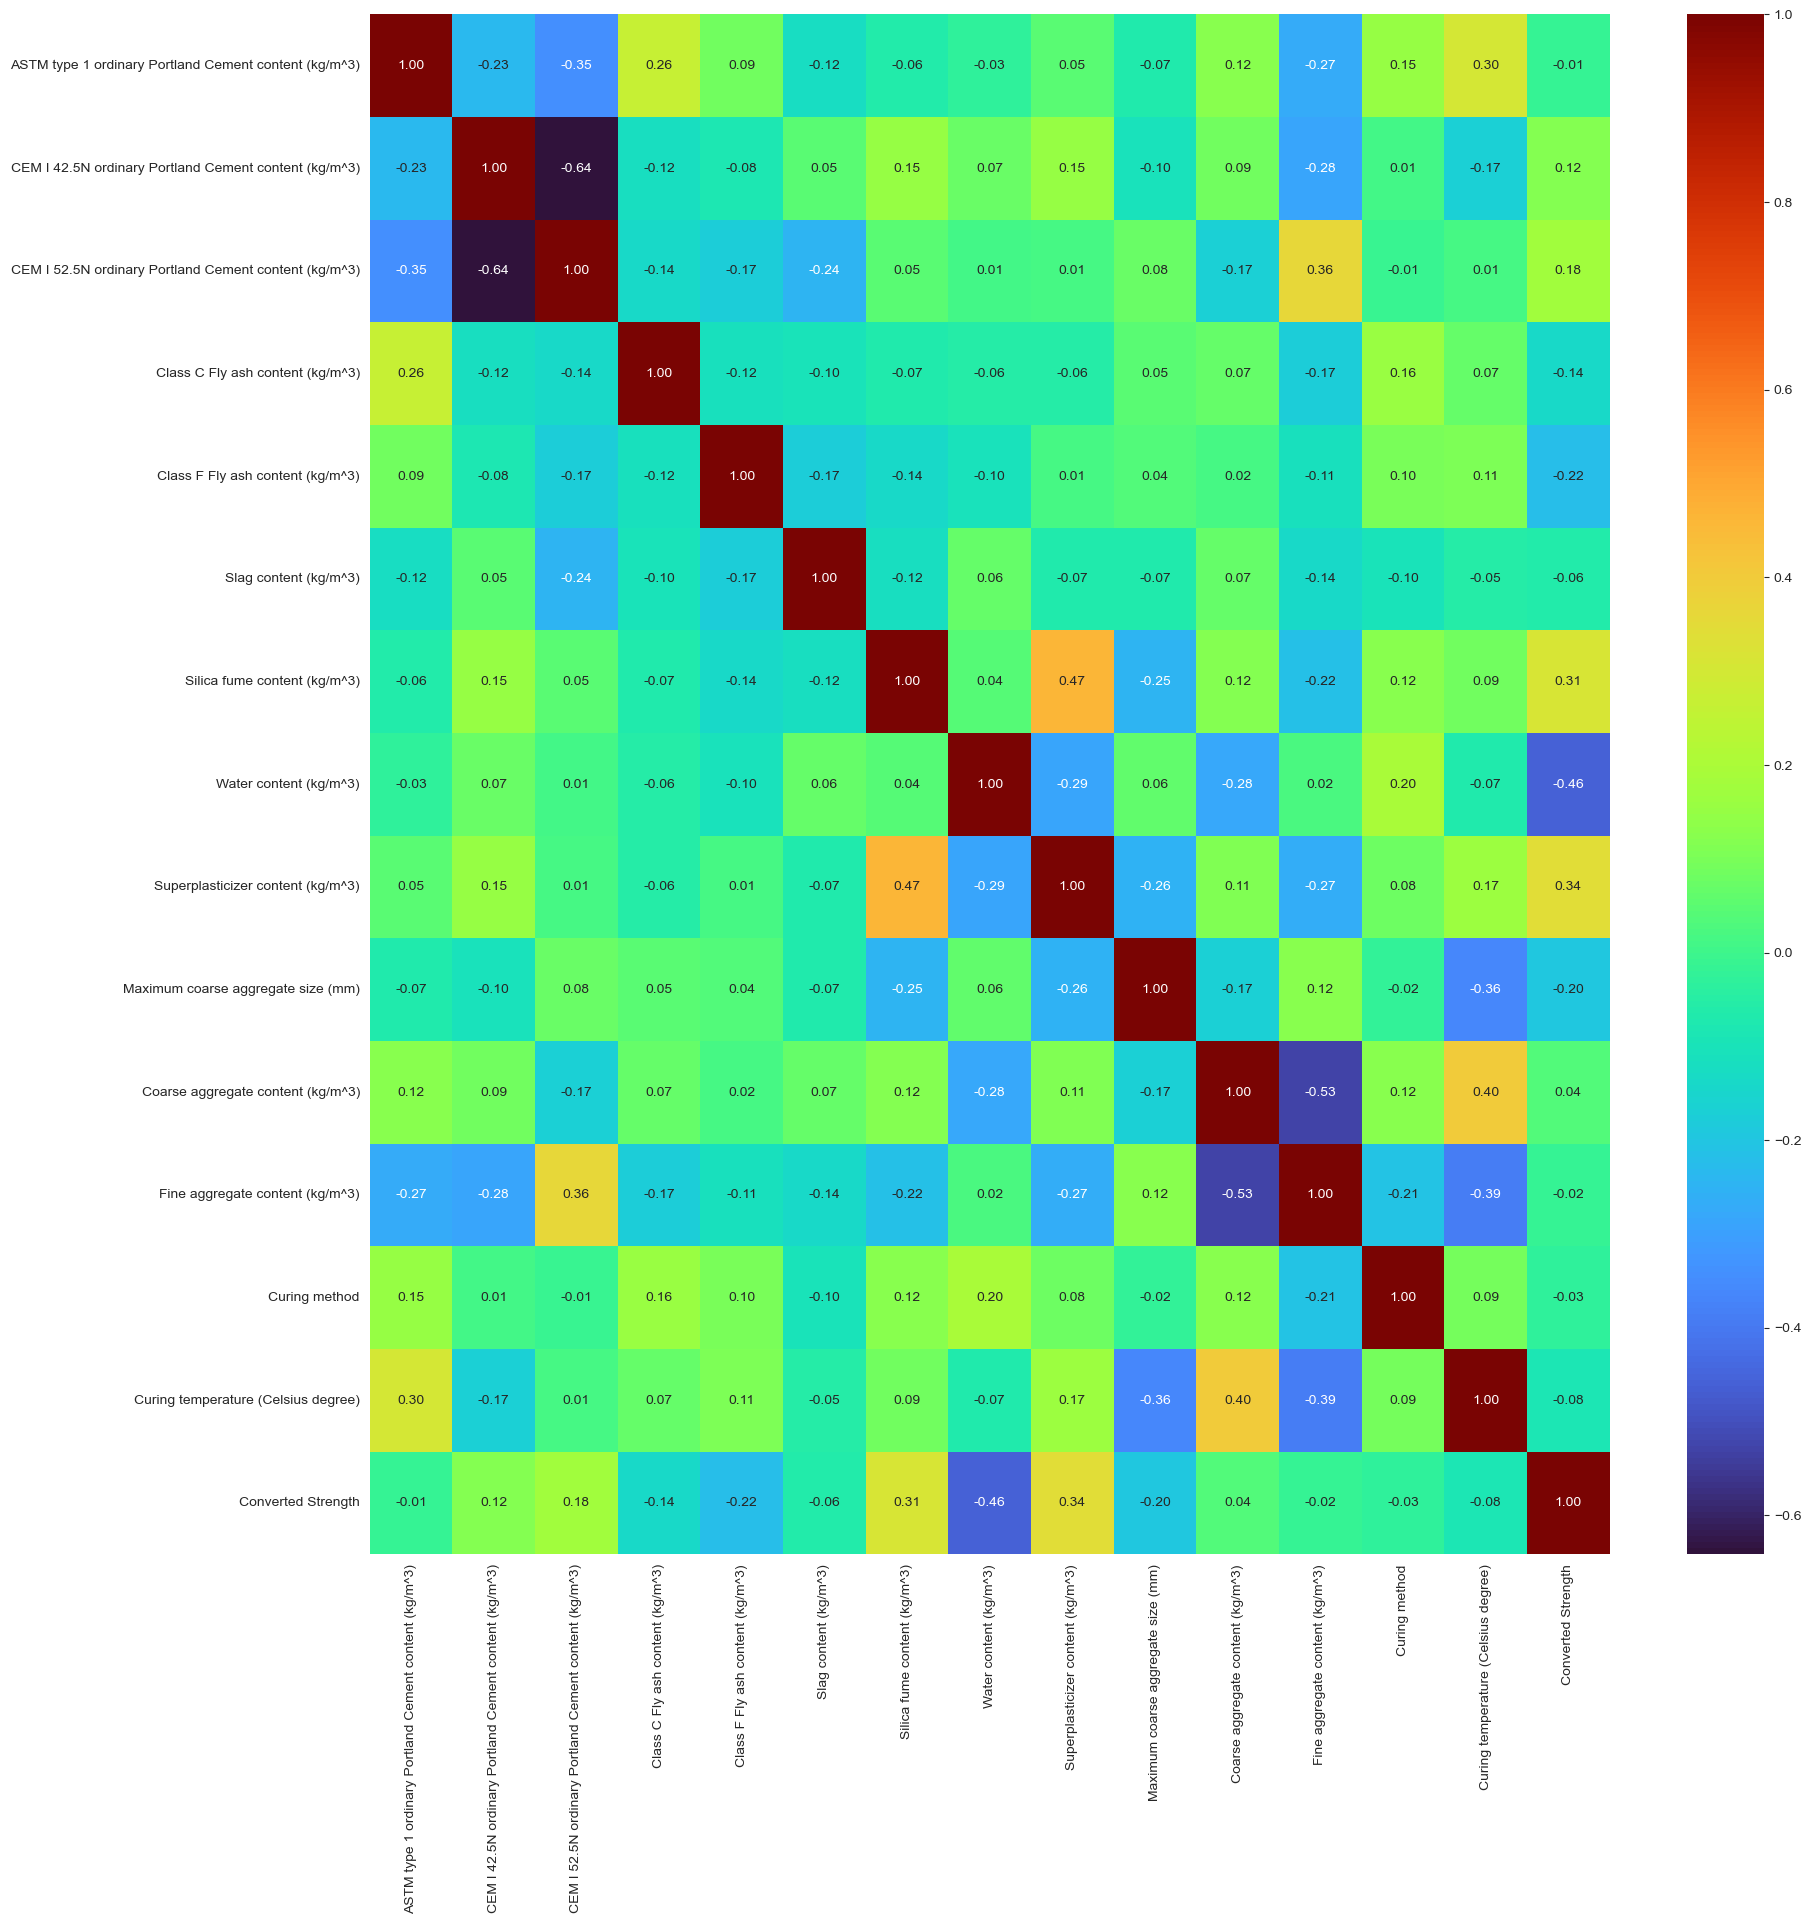

In [32]:
plt.figure(figsize=(20,20))
sns.heatmap(new_df_drop.corr(), annot = True, fmt='.2f', cmap = 'turbo')
plt.show()

In [33]:
X = new_df_drop.drop('Converted Strength', axis = 1)
Y = new_df_drop['Converted Strength']

In [34]:
X_big, X_test, y_big, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42,shuffle = True)
X_train, X_val, y_train, y_val = train_test_split(X_big,y_big, test_size = 0.2, random_state = 42,shuffle = True)

In [35]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(1239, 14)
(310, 14)
(388, 14)


# Model Evaluation Criteria

* MAE, MSE, R-square, and Adjusted R-square

In [36]:
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

In [37]:
def model_performance_regression(predictors,target,pred):
    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE

    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )

    return df_perf

In [38]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingRegressor(random_state=42)))
models.append(("Random forest", RandomForestRegressor(random_state=42)))
models.append(("AdaBoost", AdaBoostRegressor(random_state=42)))
models.append(("Gradient_Boost", GradientBoostingRegressor(random_state=42)))
models.append(("XGBoost", XGBRegressor(random_state=42)))

In [39]:
print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)  # Convert y_train to a 1-dimensional array
    scores = mean_squared_error(y_train.values.ravel(), model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)  # Convert y_train to a 1-dimensional array
    scores_val = mean_squared_error(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 8.48255967674905
Random forest: 5.863203684791074
AdaBoost: 102.6717440615394
Gradient_Boost: 38.025344073076795
XGBoost: 1.080861586883926

Validation Performance:

Bagging: 37.2578691867661
Random forest: 31.9733479983594
AdaBoost: 121.74312069210285
Gradient_Boost: 58.604884245792135
XGBoost: 26.205761277236093


# Hyperparameter tuning

## Bagging

In [40]:
%%time

Bagging_model = BaggingRegressor(random_state=42)

param_grid = {
    'n_estimators': [10, 50, 100],  # Number of base estimators (decision trees)
    'max_samples': [0.5, 0.8, 1.0],  # Proportion of samples to draw from the training set for each base estimator
    'max_features': [0.5, 0.8, 1.0],  # Proportion of features to consider for each base estimator
    'bootstrap': [True, False],  # Whether to sample with replacement (True) or without replacement (False)
    'random_state': [42]  # Random seed for reproducibility
}

scorer = metrics.make_scorer(mean_squared_error)

randomized_cv = RandomizedSearchCV(estimator=Bagging_model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=42)

randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'random_state': 42, 'n_estimators': 50, 'max_samples': 1.0, 'max_features': 1.0, 'bootstrap': False} with CV score=74.99586159131533:
CPU times: total: 1.55 s
Wall time: 4.47 s


In [41]:
Tuned_Bagging = randomized_cv.best_estimator_
Tuned_Bagging = Tuned_Bagging.fit(X_train, y_train)
Tuned_Bagging_result = Tuned_Bagging.predict(X_val)
tuned_bagging_train = model_performance_regression(X_val, y_val, Tuned_Bagging_result)
tuned_bagging_train

RMSE   MAE  R-squared  Adj. R-squared
0 7.661 4.184      0.832           0.824

## Random Forest

In [42]:
%%time

Random_Forest = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300, 500],  # Number of decision trees in the random forest
    'max_depth': [None, 5, 10],  # Maximum depth of the decision trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': np.arange(1, 4),  # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2'],  # Number of features to consider at each split
    'bootstrap': [True, False],  # Whether to sample with replacement (True) or without replacement (False)
    'random_state': [42]  # Random seed for reproducibility
}

scorer = metrics.make_scorer(mean_squared_error)

randomized_cv = RandomizedSearchCV(estimator=Random_Forest, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=42)

randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))


Best parameters are {'random_state': 42, 'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 5, 'bootstrap': False} with CV score=145.30102459239487:
CPU times: total: 203 ms
Wall time: 4.65 s


In [43]:
Tuned_forest = randomized_cv.best_estimator_
Tuned_forest = Tuned_forest.fit(X_train, y_train)
Tuned_forest_result = Tuned_forest.predict(X_val)
tuned_forest_train = model_performance_regression(X_val, y_val, Tuned_forest_result)
tuned_forest_train

RMSE   MAE  R-squared  Adj. R-squared
0 12.260 9.283      0.569           0.549

## AdaBoost

In [44]:
%%time

Ada_boost = AdaBoostRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],  # Number of base estimators
    'learning_rate': [1, 1.5, 0.2, 0.1, 0.01, 0.001],  # Learning rate shrinks the contribution of each base estimator
    'loss': ['linear', 'square', 'exponential'],  # Loss function to use when updating the weights after each boosting iteration
    'random_state': [42]  # Random seed for reproducibility
}

scorer = metrics.make_scorer(mean_squared_error)

randomized_cv = RandomizedSearchCV(estimator=Ada_boost, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=42)

randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'random_state': 42, 'n_estimators': 100, 'loss': 'exponential', 'learning_rate': 0.001} with CV score=174.13951101714358:
CPU times: total: 93.8 ms
Wall time: 1.52 s


In [45]:
Tuned_Ada = randomized_cv.best_estimator_
Tuned_Ada = Tuned_Ada.fit(X_train, y_train)
Tuned_Ada_result = Tuned_Ada.predict(X_val)
tuned_Ada_train = model_performance_regression(X_val, y_val, Tuned_Ada_result)
tuned_Ada_train

RMSE    MAE  R-squared  Adj. R-squared
0 13.814 11.088      0.453           0.427

# Gradient Boosting

In [46]:
%%time

GradientBoost = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'learning_rate': [1, 1.2, 0.1, 0.01, 0.001],  # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 5, 7],  # Maximum depth of the individual regression estimators
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2', 'sqrt'],  # Number of features to consider at each split
    'loss': ['absolute_error', 'squared_error', 'quantile', 'huber'],  # Loss function to optimize
    'random_state': [42]  # Random seed for reproducibility
}

scorer = metrics.make_scorer(mean_squared_error)

randomized_cv = RandomizedSearchCV(estimator=GradientBoost, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=42)

randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'random_state': 42, 'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 3, 'loss': 'absolute_error', 'learning_rate': 0.001} with CV score=308.57627205289594:
CPU times: total: 188 ms
Wall time: 1.77 s


In [47]:
Tuned_Gradient = randomized_cv.best_estimator_
Tuned_Gradient = Tuned_Gradient.fit(X_train, y_train)
Tuned_Gra_result = Tuned_Gradient.predict(X_val)
tuned_Gra_train = model_performance_regression(X_val, y_val, Tuned_Gra_result)
tuned_Gra_train

RMSE    MAE  R-squared  Adj. R-squared
0 18.512 14.433      0.018          -0.028

## XG Boost

In [48]:
%%time

XG_boost = XGBRegressor(random_state = 42)

param_grid = {
    'n_estimators': [50, 100, 200, 500, 750],  # Number of boosting stages
    'learning_rate': [1, 0.2, 0.1, 0.01, 0.001],  # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 5, 7],  # Maximum depth of a tree
    'subsample': [0.8, 0.9, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 0.9, 1.0],  # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2],  # Minimum loss reduction required to make a further partition on a leaf node
    'reg_alpha': [0, 0.1, 0.2, 0.5],  # L1 regularization term on weights
    'reg_lambda': [0, 0.1, 0.2, 0.5],  # L2 regularization term on weights
    'random_state': [42]  # Random seed for reproducibility
}

scorer = metrics.make_scorer(mean_squared_error)

randomized_cv = RandomizedSearchCV(estimator=XG_boost, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=42)

randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'reg_lambda': 0, 'reg_alpha': 0.2, 'random_state': 42, 'n_estimators': 50, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.8} with CV score=1131.454790299123:
CPU times: total: 1 s
Wall time: 1.6 s


In [49]:
Tuned_XG = randomized_cv.best_estimator_
Tuned_XG = Tuned_XG.fit(X_train, y_train)
Tuned_XG_result = Tuned_XG.predict(X_val)
tuned_XG_train = model_performance_regression(X_val, y_val, Tuned_XG_result)
tuned_XG_train

RMSE    MAE  R-squared  Adj. R-squared
0 33.615 30.720     -2.237          -2.391

# Summary for dropna

In [50]:
models_train_comp_df = pd.concat(
    [
        tuned_Ada_train.T,
        tuned_forest_train.T,
        tuned_bagging_train.T,
        tuned_Gra_train.T,
        tuned_XG_train.T
    ],
    axis=1,
)

models_train_comp_df.columns = [
    'Tuned_ada',
    'Tuned_forest',
    'Tuned_bagging',
    'Tuned_gradient',
    'Tuned_XG'
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Tuned_ada  Tuned_forest  Tuned_bagging  Tuned_gradient  \
RMSE               13.814        12.260          7.661          18.512   
MAE                11.088         9.283          4.184          14.433   
R-squared           0.453         0.569          0.832           0.018   
Adj. R-squared      0.427         0.549          0.824          -0.028   

                Tuned_XG  
RMSE              33.615  
MAE               30.720  
R-squared         -2.237  
Adj. R-squared    -2.391

# Performance on the test set

In [51]:
test = Tuned_Bagging.predict(X_test)
Model_test = model_performance_regression(X_test, y_test, test)
Model_test

RMSE   MAE  R-squared  Adj. R-squared
0 8.284 4.230      0.813           0.806

# SHAP

PermutationExplainer explainer: 1938it [06:33,  4.80it/s]                          


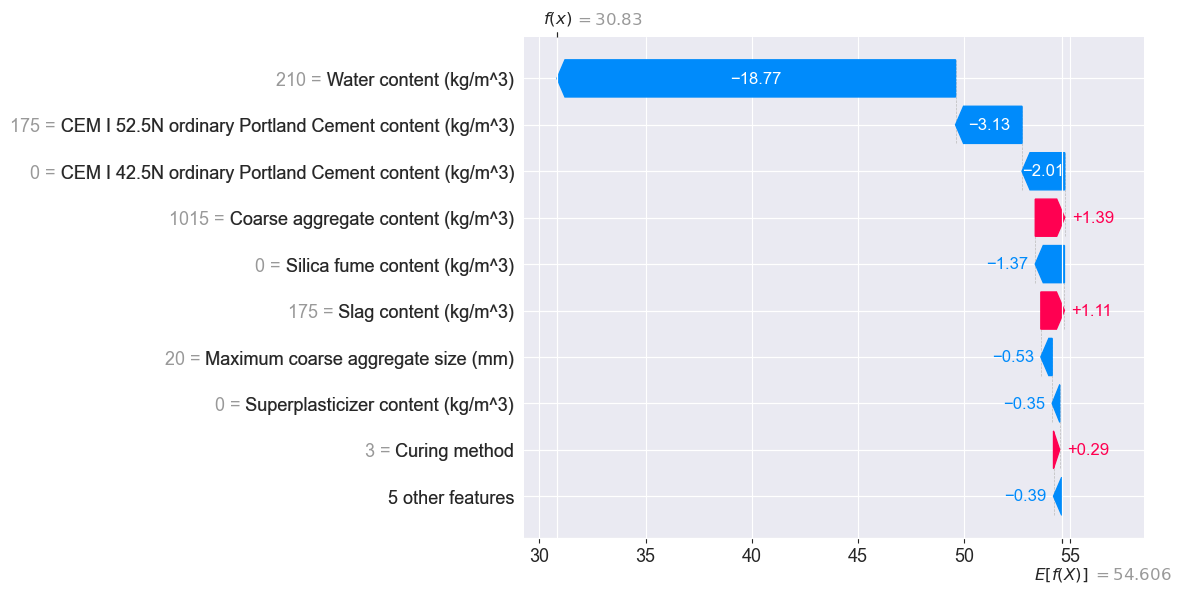

In [52]:
explainer = shap.Explainer(Tuned_Bagging.predict, X)
shap_values = explainer(X)
sample_ind = 42
shap.plots.waterfall(shap_values[sample_ind])

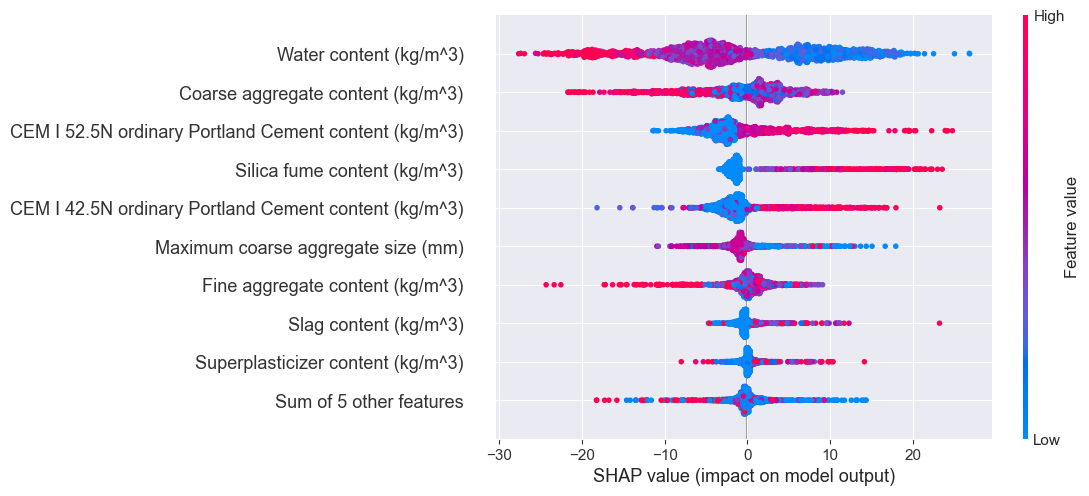

In [53]:
shap.plots.beeswarm(shap_values)

In [54]:
new_df_drop.iloc[42]

ASTM type 1 ordinary Portland Cement content (kg/m^3)      0.000
CEM I 42.5N ordinary Portland Cement content (kg/m^3)      0.000
CEM I 52.5N ordinary Portland Cement content (kg/m^3)    175.000
Class C Fly ash content (kg/m^3)                           0.000
Class F Fly ash content (kg/m^3)                           0.000
Slag content (kg/m^3)                                    175.000
Silica fume content (kg/m^3)                               0.000
Water content (kg/m^3)                                   210.000
Superplasticizer content (kg/m^3)                          0.000
Maximum coarse aggregate size (mm)                        20.000
Coarse aggregate content (kg/m^3)                       1015.000
Fine aggregate content (kg/m^3)                          869.000
Curing method                                              3.000
Curing temperature (Celsius degree)                       20.000
Converted Strength                                        30.830
Name: 42, dtype: float64

In [55]:
y_pred = Tuned_Bagging.predict(X)
df_predictions = pd.DataFrame({'True Values': Y, 'Predicted Values': y_pred})

In [56]:
df_predictions

True Values  Predicted Values
0          75.930            75.930
1          64.500            64.500
2          49.230            49.230
3          36.000            36.000
4          62.800            62.800
...           ...               ...
1967       42.350            42.350
1968       38.236            38.236
1969       46.827            46.827
1970       47.069            47.069
1971       60.021            60.021

[1937 rows x 2 columns]

In [57]:
df_predictions['Difference'] = df_predictions['True Values'] - df_predictions['Predicted Values']
df_predictions

True Values  Predicted Values  Difference
0          75.930            75.930       0.000
1          64.500            64.500       0.000
2          49.230            49.230      -0.000
3          36.000            36.000       0.000
4          62.800            62.800      -0.000
...           ...               ...         ...
1967       42.350            42.350       0.000
1968       38.236            38.236      -0.000
1969       46.827            46.827      -0.000
1970       47.069            47.069       0.000
1971       60.021            60.021      -0.000

[1937 rows x 3 columns]

In [65]:
df_predictions[df_predictions['Difference'] > 0.5]

True Values  Predicted Values  Difference
558        65.000            54.286      10.714
564        60.571            40.174      20.397
579        65.000            54.286      10.714
585        60.571            40.174      20.397
595        24.000            16.500       7.500
...           ...               ...         ...
1916       53.820            44.000       9.820
1918       60.840            44.000      16.840
1927       53.119            49.453       3.666
1928       41.140            34.010       7.130
1929       59.319            54.028       5.291

[218 rows x 3 columns]

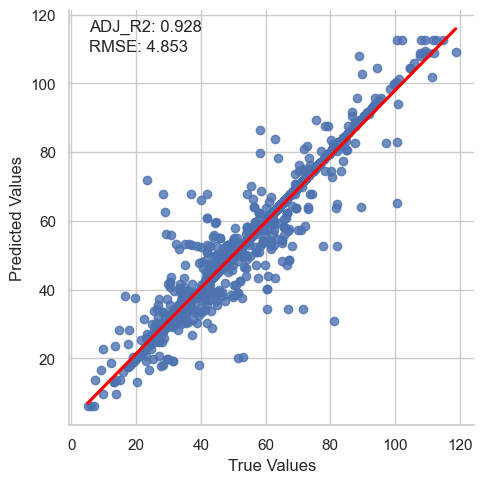

In [58]:
r2 = r2_score(df_predictions['True Values'], df_predictions['Predicted Values'])
adj_r2 = adj_r2_score(X, Y, y_pred)
rmse = mean_squared_error(df_predictions['True Values'], df_predictions['Predicted Values'], squared=False)

# Create the lmplot
sns.set(style="whitegrid")
lm_plot = sns.lmplot(data=df_predictions, x='True Values', y='Predicted Values', ci=True, line_kws={'color': 'red'})

# Annotate the plot with R2 and RMSE
plt.text(0.05, 0.95, f'ADJ_R2: {adj_r2:.3f}', transform=plt.gca().transAxes)
plt.text(0.05, 0.9, f'RMSE: {rmse:.3f}', transform=plt.gca().transAxes)

# Display the plot
plt.show()

# Missing Data

In [59]:
semi_df.isnull().sum()

ASTM type 1 ordinary Portland Cement content (kg/m^3)       0
CEM I 42.5N ordinary Portland Cement content (kg/m^3)       0
CEM I 52.5N ordinary Portland Cement content (kg/m^3)       0
Class C Fly ash content (kg/m^3)                            0
Class F Fly ash content (kg/m^3)                            0
Slag content (kg/m^3)                                       0
Silica fume content (kg/m^3)                                0
Water content (kg/m^3)                                      0
Superplasticizer content (kg/m^3)                           0
Maximum coarse aggregate size (mm)                          0
Coarse aggregate content (kg/m^3)                           5
Fine aggregate content (kg/m^3)                             5
Curing method                                               8
Curing temperature (Celsius degree)                         8
Curing humidity (%)                                         8
Curing day                                                 10
Slump (m

<Axes: >

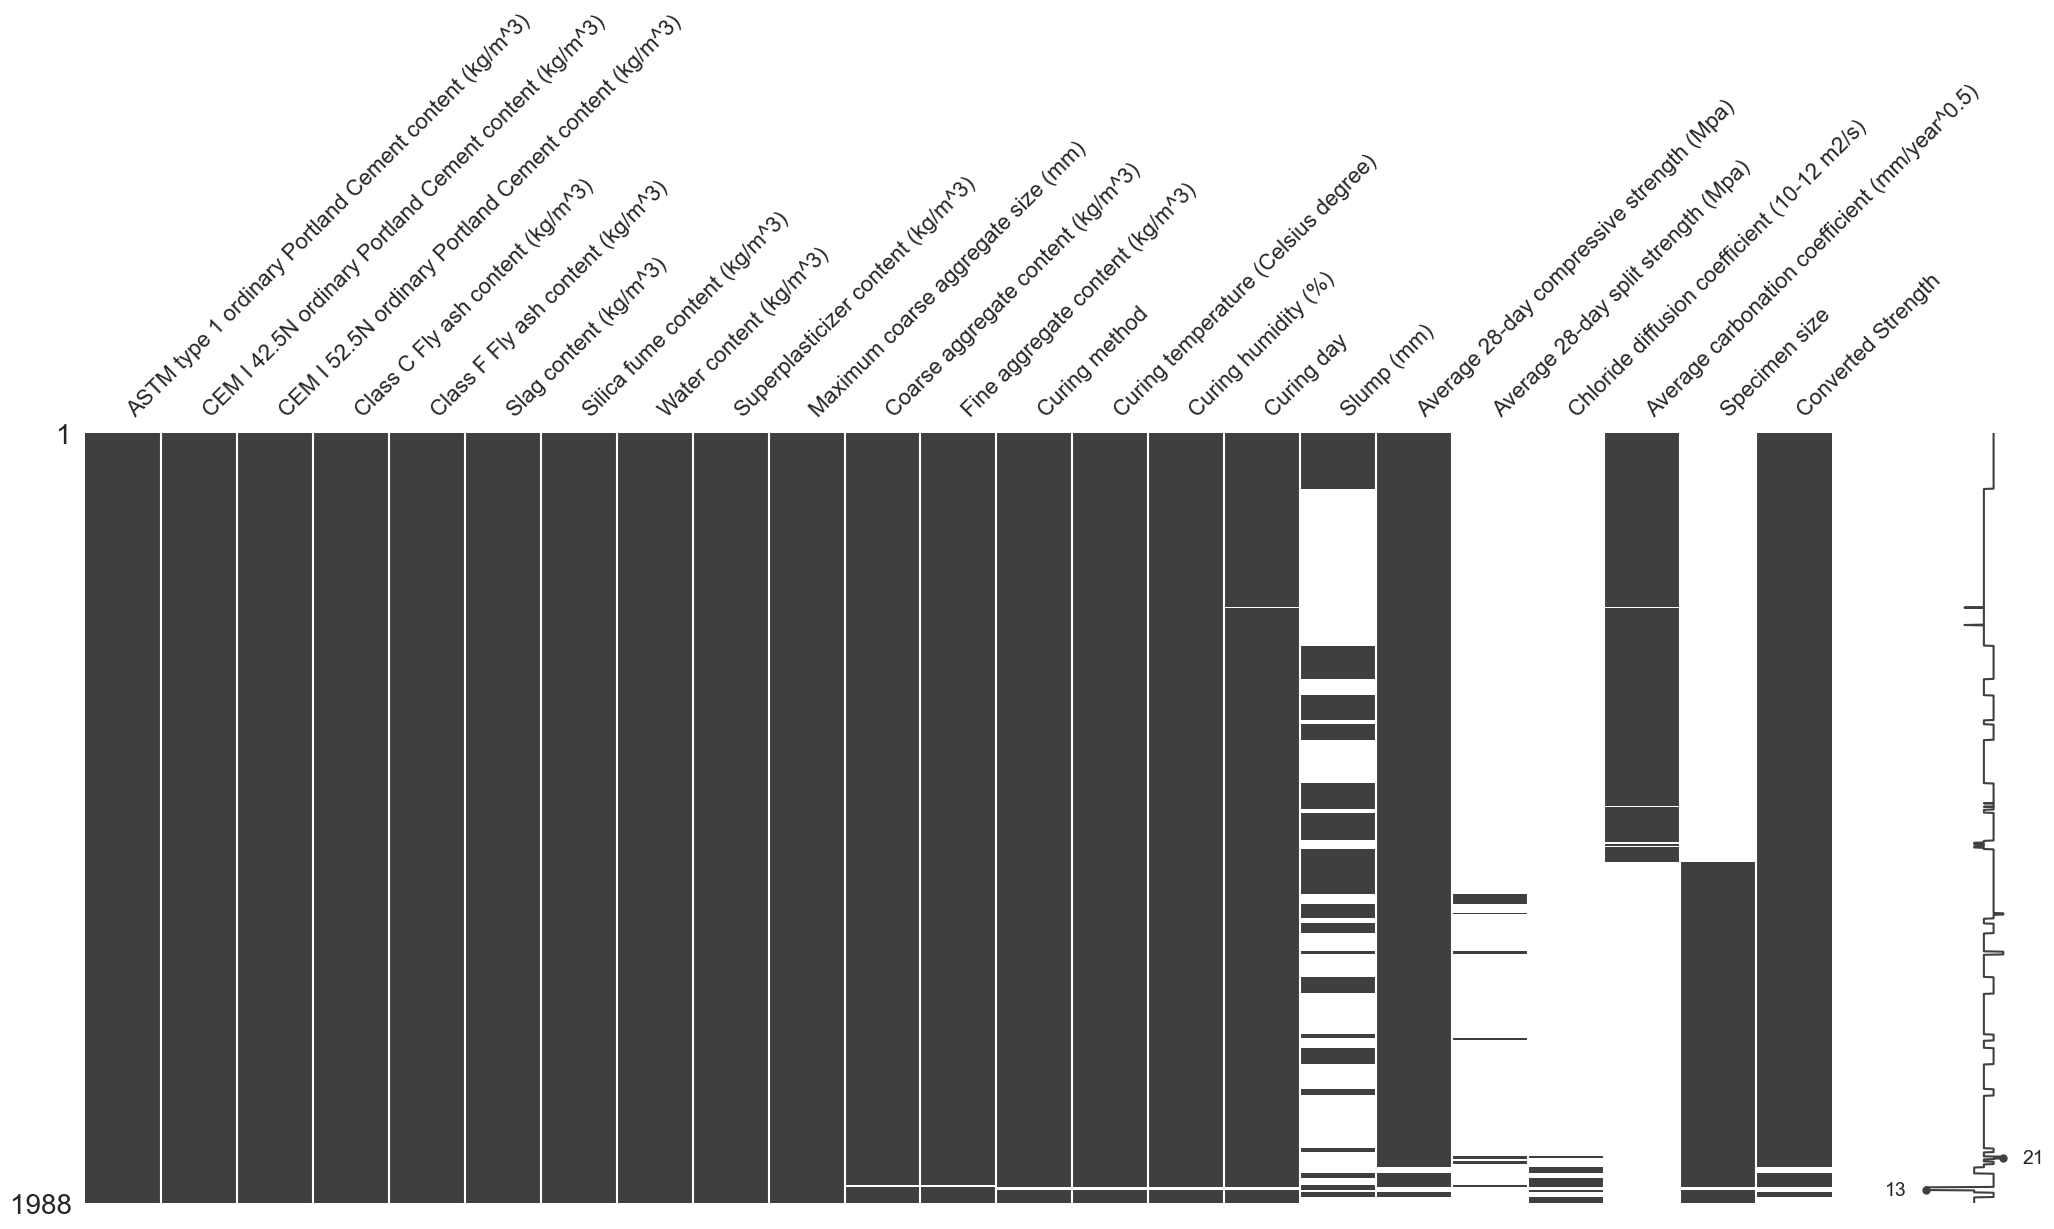

In [60]:
msno.matrix(semi_df)

<Axes: >

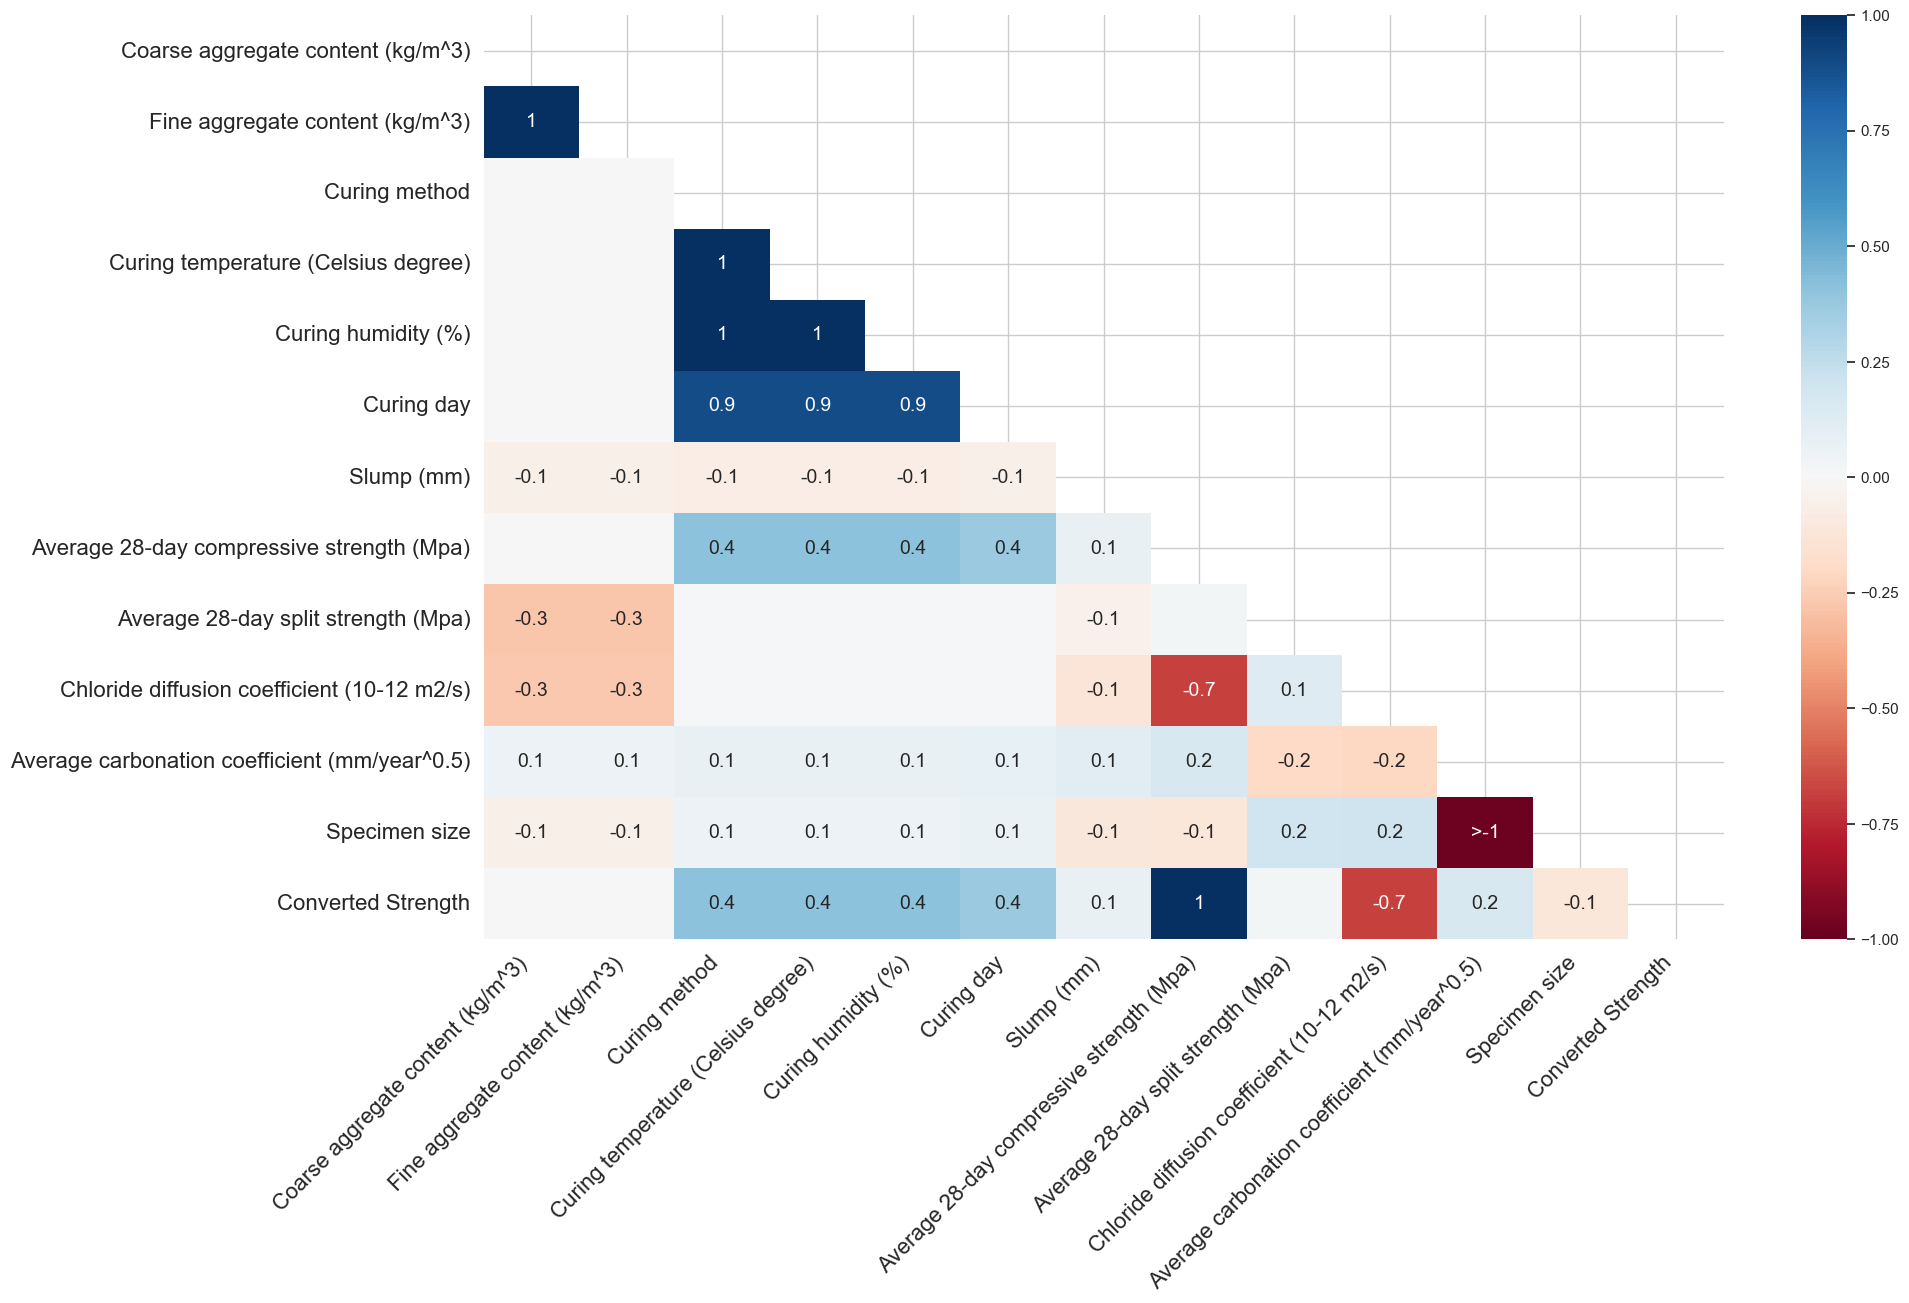

In [61]:
msno.heatmap(semi_df)

* Fine aggregate content, coarse aggregate content, curing temperature and curing method, curing humidity and curing method, have a missing correlation of 1. It implies when one row of the variable is missing, the same row is also missing for the other variable. 

* There are other three pairs of variables with missing correlation of 0.9. 


* Chloride carbonation coefficient and average 28-day compressive strength, specimen size and the average carbonation coefficient, have a negative missing correlation. A negative correlation implies when one of the row of a variable is null, the other isn't.